In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition.pca import PCA

%matplotlib inline  

seed = 123
np.random.seed(seed)  # for reproducibility
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
def converte_periodo_cod(cod_inicio,cod_fim):
    def converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final):
        anos = ano_final-ano_inicial    
        return 2*anos + semestre_final-semestre_inicial
        
    ano_inicial      = int(str(cod_inicio)[0:4])
    ano_final        = int(str(cod_fim)[0:4])
    semestre_inicial = int(str(cod_inicio)[4:])
    semestre_final   = int(str(cod_fim)[4:])
    
    periodos_totais = converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final)
    
    print(ano_inicial,ano_final,semestre_inicial,semestre_final,periodos_totais)
    return periodos_totais

In [3]:
def create_aluno_array(id_aluno,max_periodos = 8):

    aluno = {}

    aluno_df = df[df.aluno == id_aluno]

    aluno_concluiu = aluno_df.concluiu.values[0]
    aluno_ano_inicio = np.min(aluno_df.periodo.values)
    aluno_periodo = [converte_periodo_cod(aluno_ano_inicio,p)   for p in aluno_df.periodo.values]

    aluno_periodo = np.array(aluno_periodo)
    aluno_disciplinas = aluno_df.disciplina.values
    aluno_notas = aluno_df.nota.values

    aluno['aluno_concluiu'] = aluno_concluiu

    print(aluno_concluiu)
    print(aluno_disciplinas)
    print(aluno_notas)
    print(aluno_periodo)

    aluno_dict = {}
    for i in range(max_periodos):
        ids = np.where(aluno_periodo == i)[0]
        print(ids)
        aluno_dict[i] = [[aluno_disciplinas[ii], aluno_notas[ii]] for ii in ids]

    print(aluno_dict)
    aluno['periodos'] = aluno_dict
    
    
    def create_aluno_matrix(aluno_dict, disciplinas, disciplinas_dict, max_periodos=8):
        aluno_matrix = np.zeros((max_periodos, len(disciplinas))) - 1
        for per in range(max_periodos):
            for it in aluno_dict['periodos'][per]:
                aluno_matrix[per, disciplinas_dict[it[0]]] = it[1]  # matrix recebe nota na posicao correta
    
        return aluno_matrix

    aluno_matrix = create_aluno_matrix(aluno, disciplinas, disciplinas_dict, max_periodos=8)
    aluno['matrix'] = aluno_matrix
    
    return aluno

In [4]:
#xl = pd.ExcelFile("data.xlsx")
#df = xl.parse(xl.sheet_names[0])
#df.head(10)

df = pd.read_excel("data.xlsx")
df.head(10)

,aluno,curso,disciplina,nota,periodo,concluiu
0,153613,MATEMÁTICA,GMA04084,97,20072,0
1,154208,MATEMÁTICA,SSE03068,97,20082,0
2,154537,MATEMÁTICA,TCC03063,97,20052,0
3,154793,MATEMÁTICA,GGM04082,97,20052,0
4,154793,MATEMÁTICA,SSE02052,97,20081,0
5,159905,MATEMÁTICA,GMA00114,97,20092,0
6,160569,MATEMÁTICA,TCC03063,97,20071,0
7,162752,MATEMÁTICA,SFP00087,97,20091,0
8,163854,MATEMÁTICA,TCC03063,97,20091,0
9,166571,MATEMÁTICA,GAN04096,97,20081,0


In [5]:
X = df.iloc[:, :5]
Y = df.iloc[:, 5]

print(X.shape)
print(Y.shape)

(20482, 5)
(20482,)


In [6]:
#%%
disciplinas = np.unique(df.disciplina)

disciplinas_dict = {}
for i,it in enumerate(disciplinas):
    disciplinas_dict[i]=it
    disciplinas_dict[it]=i

print(disciplinas.size)
disciplinas

297


array(['CED00001', 'GAG00028', 'GAG04021', 'GAN00008', 'GAN00144',
       'GAN00145', 'GAN00146', 'GAN00147', 'GAN00148', 'GAN00152',
       'GAN00153', 'GAN00154', 'GAN00155', 'GAN00156', 'GAN00157',
       'GAN00159', 'GAN00160', 'GAN00161', 'GAN00162', 'GAN00163',
       'GAN00164', 'GAN00165', 'GAN00167', 'GAN00168', 'GAN00169',
       'GAN00172', 'GAN00173', 'GAN00175', 'GAN00176', 'GAN04061',
       'GAN04071', 'GAN04072', 'GAN04096', 'GAN04123', 'GAN04124',
       'GAN04125', 'GAN04126', 'GAN04127', 'GAN04129', 'GAN04130',
       'GAN04134', 'GAN06094', 'GAN06118', 'GAN06122', 'GAN06128',
       'GAT00130', 'GAT02012', 'GAT03017', 'GAT03033', 'GAT04011',
       'GAT04016', 'GAT04036', 'GAT04056', 'GAT04093', 'GCO00414',
       'GEF00019', 'GEF00020', 'GEF00022', 'GEF00024', 'GEF00025',
       'GEF00026', 'GEF00027', 'GEF00028', 'GEF00029', 'GEF00030',
       'GEF00099', 'GEF00100', 'GEF00101', 'GEF01004', 'GEF01007',
       'GEF01009', 'GEF01013', 'GEF01014', 'GEF01015', 'GEF010

In [7]:
#dict = { 0:1, 1:2, 10:3, 11:4, 20:5, 21:6, 30:7, 31:8, 40:9, 41:10, }
aluno_map_dict = {  }
c = 0
for p in range(0,300,10):
    aluno_map_dict[p] = c
    aluno_map_dict[p+1] = c+1
    c += 2
    
#%%
print(aluno_map_dict)

{0: 0, 1: 1, 130: 26, 131: 27, 260: 52, 261: 53, 10: 2, 11: 3, 140: 28, 141: 29, 270: 54, 271: 55, 20: 4, 21: 5, 150: 30, 151: 31, 280: 56, 281: 57, 30: 6, 31: 7, 160: 32, 161: 33, 290: 58, 291: 59, 40: 8, 41: 9, 170: 34, 171: 35, 50: 10, 51: 11, 180: 36, 181: 37, 60: 12, 61: 13, 190: 38, 191: 39, 70: 14, 71: 15, 200: 40, 201: 41, 80: 16, 81: 17, 210: 42, 211: 43, 90: 18, 91: 19, 220: 44, 221: 45, 100: 20, 101: 21, 230: 46, 231: 47, 110: 22, 111: 23, 240: 48, 241: 49, 120: 24, 121: 25, 250: 50, 251: 51}


In [8]:
alunos = np.unique(df.aluno)
len(alunos)

X = []
Y = []

for aluno in alunos:
    aluno_dict = create_aluno_array(aluno)
    X.append(aluno_dict['matrix'].ravel())    
    Y.append(aluno_dict['aluno_concluiu'])

X = np.array(X)
Y = np.array(Y)

2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2006 1 2 3
2005 2005 1 1 0
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 2 3
2005 2007 1 2 5
2005 2007 1 2 5
0
['GMA06076' 'GGM04080' 'GMA04075' 'GGT02001' 'GGM04081' 'GGT02001'
 'GMA04075' 'GGM04080' 'GGM04081' 'GAN04071' 'GMA06076' 'GAN04071'
 'GGM04082' 'GGM04082' 'GGM04082' 'GAN04071']
[68 65 64 64 60 43 43 40 27 12 10  0  0  0  0  0]
[1 1 1 1 1 0 0 0 0 3 0 2 2 3 5 5]
[ 5  6  7  8 10]
[0 1 2 3 4]
[11 12]
[ 9 13]
[]
[14 15]
[]
[]
{0: [['GGT02001', 43], ['GMA04075', 43], ['GGM04080', 40], ['GGM04081', 27], ['GMA06076', 10]], 1: [['GMA06076', 68], ['GGM04080', 65], ['GMA04075', 64], ['GGT02001', 64], ['GGM04081', 60]], 2: [['GAN04071', 0], ['GGM04082', 0]], 3: [['GAN04071', 12], ['GGM04082', 0]], 4: [], 5: [['GGM04082', 0], ['GAN04071', 0]], 6: [], 7: []}
2005 2007 1 1 4
2005 2005 1 2 1
2005 2006 1 2 3
2005 2005 1 1 0
2005 2005 1 1 0
2005 2

2005 2005 1 1 0
2005 2007 1 1 4
2005 2005 1 2 1
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 2 1
2005 2007 1 1 4
2005 2006 1 2 3
2005 2005 1 1 0
2005 2006 1 1 2
2005 2006 1 2 3
2005 2006 1 2 3
2005 2006 1 1 2
2005 2007 1 1 4
2005 2005 1 1 0
2005 2006 1 1 2
2005 2007 1 1 4
0
['GGM04080' 'GGM04082' 'GMA06076' 'GGT02001' 'GMA04075' 'GGM04081'
 'GMA06077' 'GGM04082' 'GGM04081' 'GGM04082' 'GAN04071' 'GMA06077'
 'GAN04071' 'GAN04071' 'GMA06076' 'GMA06077' 'TCC03063']
[73 69 63 60 60 60 27 26 21 20 18 17 15 12  7  0  0]
[0 4 1 0 0 1 4 3 0 2 3 3 2 4 0 2 4]
[ 0  3  4  8 14]
[2 5]
[ 9 12 15]
[ 7 10 11]
[ 1  6 13 16]
[]
[]
[]
{0: [['GGM04080', 73], ['GGT02001', 60], ['GMA04075', 60], ['GGM04081', 21], ['GMA06076', 7]], 1: [['GMA06076', 63], ['GGM04081', 60]], 2: [['GGM04082', 20], ['GAN04071', 15], ['GMA06077', 0]], 3: [['GGM04082', 26], ['GAN04071', 18], ['GMA06077', 17]], 4: [['GGM04082', 69], ['GMA06077', 27], ['GAN04071', 12], ['TCC03063', 0]], 5: [], 6: [], 7: []}
2005 2005 1 2 1
2005 2005 1 

[14 15 16 17 18]
[19 20 21 22]
[23 24 25 26 27 28]
[29 30 31 32 33 34 35]
[36 37 38 39 40 41]
{0: [['GGM04081', 10], ['GGT02001', 42], ['GMA04075', 42], ['GMA06076', 25], ['GGM04080', 50]], 1: [['GMA04075', 51], ['GMA06076', 68], ['TCC03063', 62], ['GGM04081', 65], ['GGT02001', 51]], 2: [['GAN04071', 66], ['GFI06108', 60], ['GGM04082', 60], ['GMA06077', 82]], 3: [['SFP04013', 100], ['GAN04072', 53], ['GAN04096', 66], ['GMA06078', 68], ['SSE00229', 90]], 4: [['GMA04079', 57], ['SSE00228', 85], ['TCC03059', 60], ['GAN06094', 65]], 5: [['GAN04134', 70], ['GGM04088', 50], ['GGM04074', 60], ['GAN06122', 62], ['GGM06087', 60], ['SSE04036', 95]], 6: [['SSE02052', 90], ['GFI00159', 42], ['SSE04083', 90], ['GFI00162', 60], ['GGM04089', 65], ['GGT02004', 90], ['GAN04123', 46]], 7: [['SSE04128', 100], ['SSE03068', 87], ['SSE02207', 80], ['GMA00114', 60], ['GFI00159', 40], ['GMA00119', 79]]}
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 2 1
2005 2005 1

2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
1
['GGT02001' 'GMA04075' 'GMA06076' 'GGM04081' 'GGM04080' 'GAN04071'
 'GMA06077' 'GGM04082' 'GAN04072' 'TCC03063' 'GAN04096' 'GMA06078'
 'TCC03059' 'GAN06094' 'GAN04129' 'GMA04079' 'GMA04094' 'GGM04074'
 'GAN06122' 'GFI06108' 'GAN04123' 'GGT06007' 'GEF01009' 'GFI06109'
 'GAN04125' 'GAN04130' 'GAN04126' 'GAN04124' 'GAN04127' 'GGM06076'
 'GAN06128' 'GMA04080']
[ 77  77  92  91  79 100  83  74  83  66  87  88  80  69  95  85  87  91
  97  80  71  71  70  83  75  95  90  85 100  74 100  76]
[0 0 0 0 0 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 5 5 6 6 6 7 7 7]
[0 1 2 3 4]
[5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]
[20 21 22 23 24 25]
[26 27 28]
[29 30 31]
{0: [['GGT02001', 77], ['GMA04075', 77], ['GMA06076', 92], ['GGM04081', 91], ['GGM04080', 79]], 1: [['GAN04071', 100], ['GMA06077', 83], ['GGM04082', 74]], 2: [['

2005 2011 2 1 11
2005 2011 2 2 12
2005 2011 2 2 12
2005 2012 2 1 13
2005 2012 2 2 14
2005 2012 2 2 14
0
['SSE00228' 'SSE00233' 'SSE00230' 'GGT02002' 'GFI00162' 'GGM04081'
 'GAN04134' 'TCC00163' 'GMA00114' 'GGM00173' 'GGM04088' 'GAN00155'
 'GMA00109' 'CED00001' 'SFP00087' 'SSE00231' 'GMA06076' 'GGT02001'
 'GMA04075' 'GMA00111' 'GAN04071' 'GMA00110' 'GAN00156' 'GMA00112'
 'SSE00232' 'GFI00159' 'GAN00153' 'GAN00152' 'GGM04082' 'GAN04072'
 'GGM00179' 'GGM04080' 'GFI06108' 'GMA04075' 'GGT02001' 'GAN04071'
 'GAN04072' 'TCC00162' 'GMA00119' 'GGM00167' 'GGM04081' 'GMA04075'
 'GGT02001' 'GAN00155' 'SSE00233' 'GGM04088' 'GMA06077' 'GMA06076'
 'GAN04071' 'GFI00159' 'GAN04072' 'GGM00167' 'GMA06077' 'TCC03063'
 'GFI00159' 'GGM06087' 'GMA00109' 'GGM00167' 'TCC03063' 'GGM04074'
 'TCC03063' 'GMA00111' 'GEF01014' 'GAN04129' 'GMA00111' 'GMA00112'
 'GAN00153' 'GMA00119' 'GMA00111' 'TCC00163' 'CED00001' 'GGM00179']
[92 90 87 85 85 83 75 74 70 70 69 69 69 67 65 65 62 61 61 61 60 60 60 60 60
 60 60 58 55 50

2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
1
['GGM04080' 'GGT02001' 'GMA04075' 'TCC03063' 'GGM04081' 'GMA06076'
 'GAN04071' 'GGM04082' 'GMA06076' 'TCC03063' 'GMA06077' 'SFP04013'
 'GAN04096' 'SSE00229' 'GAN04134' 'GAN04071' 'GGM04088' 'GMA06078'
 'GGT02004' 'SSE04036' 'GGT02002' 'GAN04072' 'GAN06094' 'GFI00158'
 'GFI00161' 'GGM00164' 'SSE00228' 'GMA00114' 'GGM04074' 'SSE04128'
 'GAN00152' 'TCC03063' 'GAN00153' 'GMA00119' 'SSE00231' 'GMA06071'
 'GGM04089' 'GGM00167' 'SSE00232' 'TCC03059' 'SSE04083' 'GGT02004'
 'GFI00159' 'SSE00233' 'GFI00162']
[ 41  41  41   0  70  40  25  84  85  25  68  88  74 100  91  77  60  65
  95 

2005 2007 1 2 5
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GMA06077'
 'GGM04082' 'GAN04071' 'TCC03063' 'GAN04096' 'GFI06108' 'GMA06078'
 'GAN06094' 'GAN04072' 'GAN04125' 'GAN04129' 'GGT02003' 'GGT06007'
 'GMA04079' 'GAN06122' 'GAN04123' 'GAN04126' 'GGT02002' 'GMA04079'
 'GMA04080' 'TCC03059' 'GAN04124' 'GAN04127' 'GAN06128' 'GFI00159'
 'GFI00162' 'GGM06076']
[73 75 79 79 88 94 94 83 86 86 60 80 73 90 75 80 90 80 51 80 80 91 85 86 73
 60 90 90 70 48 61 93]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5 6 6 6]
[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13]
[14 15 16 17 18]
[19 20 21 22 23 24 25]
[26 27 28]
[29 30 31]
[]
{0: [['GGM04080', 73], ['GGM04081', 75], ['GGT02001', 79], ['GMA04075', 79], ['GMA06076', 88]], 1: [['GMA06077', 94], ['GGM04082', 94], ['GAN04071', 83], ['TCC03063', 86], ['GAN04096', 86]], 2: [['GFI06108', 60], ['GMA06078', 80], ['GAN06094', 73], ['GAN04072', 90]], 3: [['GAN04125', 75], [

 'GGM04081' 'GMA06076']
[83 80 61 48 48 40 40 31 24 24 23  6  3  1]
[2 3 3 1 1 0 1 2 0 0 2 2 0 0]
[ 5  8  9 12 13]
[3 4 6]
[ 0  7 10 11]
[1 2]
[]
[]
[]
[]
{0: [['GGM04080', 40], ['GMA04075', 24], ['GGT02001', 24], ['GGM04081', 3], ['GMA06076', 1]], 1: [['GGT02001', 48], ['GMA04075', 48], ['GGM04081', 40]], 2: [['SFP04013', 83], ['GGM04081', 31], ['TCC03063', 23], ['GMA06076', 6]], 3: [['SSE00228', 80], ['GGM04081', 61]], 4: [], 5: [], 6: [], 7: []}
2005 2007 1 1 4
2005 2007 1 2 5
2005 2005 1 1 0
2005 2006 1 2 3
2005 2005 1 2 1
2005 2006 1 1 2
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 2 1
2005 2006 1 1 2
2005 2005 1 2 1
2005 2007 1 2 5
2005 2006 1 1 2
2005 2005 1 1 0
2005 2006 1 2 3
2005 2006 1 1 2
2005 2006 1 2 3
2005 2007 1 1 4
2005 2005 1 1 0
2005 2007 1 1 4
2005 2006 1 2 3
2005 2007 1 1 4
0
['SFP04013' 'SSE00228' 'GGM04080' 'GET04007' 'GGM04081' 'GAN04071'
 'GGT02001' 'GMA04075' 'TCC03063' 'GAN04096' 'GMA06077' 'GAN06094'
 'GGM04082' 'GMA06076' 'GAN04072' 'GFI06108' 'GMA06078' 'GF

2005 2007 2 1 3
2005 2008 2 1 5
2005 2005 2 2 0
2005 2007 2 1 3
2005 2005 2 2 0
2005 2006 2 2 2
2005 2008 2 1 5
0
['TEC02105' 'TDT03015' 'TEC03188' 'TCC03060' 'TCC03063' 'GGM02055'
 'GFI05100' 'GMA04075' 'GGT02001' 'GGM04082' 'GET04021' 'GMA06074'
 'GGM04080' 'GGM03077' 'GGM04081' 'GAN04071' 'GMA06076' 'GAN04071'
 'GAN06118' 'GET04021' 'GGM02055' 'GFI05100' 'GGT02001' 'GFI05100'
 'GGM04081' 'GMA06077' 'GMA06074']
[84 84 82 81 76 76 73 72 72 69 66 64 60 60 54 51 50 49 47 41 38 35 34 33 18
  9  6]
[4 6 5 4 1 4 6 1 1 2 6 6 0 5 1 2 1 3 4 5 3 5 0 3 0 2 5]
[12 22 24]
[ 4  7  8 14 16]
[ 9 15 25]
[17 20 23]
[ 0  3  5 18]
[ 2 13 19 21 26]
[ 1  6 10 11]
[]
{0: [['GGM04080', 60], ['GGT02001', 34], ['GGM04081', 18]], 1: [['TCC03063', 76], ['GMA04075', 72], ['GGT02001', 72], ['GGM04081', 54], ['GMA06076', 50]], 2: [['GGM04082', 69], ['GAN04071', 51], ['GMA06077', 9]], 3: [['GAN04071', 49], ['GGM02055', 38], ['GFI05100', 33]], 4: [['TEC02105', 84], ['TCC03060', 81], ['GGM02055', 76], ['GAN06118', 47

[]
[]
[]
[]
{0: [['GGM04080', 10], ['GGT02001', 10], ['GMA04075', 10]], 1: [['GGT02001', 10], ['GMA04075', 10], ['GMA06076', 8], ['GGM04080', 7], ['GGM04081', 7], ['GGM06076', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
0
['GGT02001' 'GMA04075' 'GGM04080' 'GGM04081' 'GMA06076']
[14 14  8  5  0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGT02001', 14], ['GMA04075', 14], ['GGM04080', 8], ['GGM04081', 5], ['GMA06076', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
0
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM04080', 0], ['GGM04081', 0], ['GGT02001', 0], ['GMA04075', 0], ['GMA06076', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2005 2 2 0
2005 2005 2 2 0
2005 2005 2 2 0
2005 2006 2 1 1
2005 2006 2 1 1
2005 2006 2 1 1
20

2006 2006 1 2 1
2006 2009 1 2 7
2006 2010 1 1 8
2006 2007 1 2 3
2006 2008 1 1 4
2006 2010 1 2 9
2006 2007 1 1 2
2006 2010 1 2 9
2006 2007 1 2 3
2006 2007 1 1 2
2006 2008 1 2 5
2006 2007 1 1 2
2006 2008 1 1 4
2006 2006 1 2 1
2006 2006 1 2 1
2006 2010 1 1 8
2006 2010 1 1 8
2006 2006 1 2 1
2006 2006 1 1 0
2006 2010 1 1 8
2006 2010 1 1 8
2006 2006 1 1 0
2006 2006 1 1 0
2006 2008 1 1 4
2006 2007 1 2 3
2006 2006 1 1 0
2006 2006 1 1 0
2006 2008 1 1 4
0
['SSE04145' 'SSE00231' 'GMA00119' 'GMA00114' 'GFI00161' 'GGM00164'
 'SSE00228' 'GFI00162' 'GGM04089' 'GGM04081' 'SSE00230' 'GET00121'
 'GAN04096' 'GFI00158' 'GAN04134' 'GAN04071' 'GAN00153' 'GAN04072'
 'GMA06077' 'GFI00159' 'GGM04082' 'GAN06094' 'GGT02001' 'GMA04075'
 'GGM04088' 'GAN00152' 'GMA06076' 'GGM04080' 'TCC03059' 'GGM00167'
 'GMA04075' 'GGT02001' 'GMA04079' 'GMA06078' 'GGM04081' 'GMA06076'
 'GAN06122']
[95 95 93 93 92 92 90 88 88 86 86 86 85 81 80 79 76 73 70 69 68 66 65 65 64
 64 61 60 60 60 49 49 43 40 34 30 20]
[5 8 5 7 4 6 7 5 8 1 

2006 2011 1 2 11
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
1
['GMA06076' 'GGM04080' 'GGM04081' 'GMA04075' 'GGT02001' 'GAN04096'
 'GGM04082' 'GMA06077' 'GAN04071' 'TCC03063' 'GAN04071' 'GAN04096'
 'GMA06077' 'TCC03063' 'GAN04072' 'GAN04096' 'TCC03059' 'GMA06078'
 'GFI06108' 'GFI00162' 'GGM04074' 'SFP00087' 'GAN04072' 'GAN06094'
 'GFI00159' 'GAN06122' 'GGM04074' 'GAN00156' 'GAN00152' 'GGM00167'
 'GMA04079' 'SSE00229' 'GGM00167' 'GAN00152' 'GAN04134' 'GMA00119'
 'SSE00229' 'GAN00153' 'GET00121' 'GGM04088' 'GAN04129' 'GAN04134'
 'GGM04089' 'GAN04126' 'GMA00119' 'SSE00230' 'GAN00157' 'GFI00159'
 'GFI00162' 'GAN04126' 'GAN00168' 'GAN04134' 'SSE00230' 'GMA00114'
 'SSE00228' 'SSE00231' 'GGM00164' 'GFI00162' 'GGT02002' 'GGM00170'
 'GAN00157' 'GMA04080' 'SSE00232' 'GAN00169' 'GMA00125' 'SSE00233'
 'SFP04023' 'GAN00169' 'GAN00168' 'GGM00176' 'GMA00125']
[ 43  79  75  88  88   0  99  46  

2006 2010 1 1 8
2006 2012 1 2 13
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 2 13
2006 2012 1 2 13
0
['GAN04072' 'GAN00152' 'SFP00087' 'GAN04071' 'GGT02002' 'SSE00228'
 'GGM00164' 'GGT02001' 'GMA04075' 'SSE00230' 'GGM04089' 'GAN04096'
 'TCC03059' 'GGM04081' 'GAN00156' 'GMA00112' 'GGM04080' 'TCC03063'
 'GMA06077' 'GFI00158' 'GFI00161' 'GET00121' 'GMA06076' 'GGM04074'
 'GGM04082' 'GFI00159' 'GMA06078' 'GAN04071' 'GFI00158' 'GMA04079'
 'GAN04129' 'GAN00165' 'GAN00153' 'GMA06078' 'GFI00161' 'GAN00152'
 'SSE00231' 'GGM00167' 'GMA00119' 'GGT00012' 'GMA00119']
[90 90 90 87 85 85 85 79 79 76 75 73 68 63 62 61 60 60 60 60 60 60 51 50 44
 44 40 37 31 28 25 20 18 11 10 10 10  8  0  0  0]
[ 3 10 11  2  8 10 12  0  0 12 11  2  3  0  5  9  0  1  1  5  6 11  0  9  1
  6  4  1  4  6  8 12 11  3  4  8 13 11 12 13 13]
[ 7  8 13 16 22]
[17 18 24 27]
[ 3 11]
[ 0 12 33]
[26 28 34]
[14 19]
[20 25 29]
[]
{0: [['GGT02001', 79], ['GMA04075', 79], ['GGM04081', 63], ['GGM04080', 60], ['GMA06076', 51]], 1: [['T

2006 2011 1 1 10
2006 2011 1 1 10
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
1
['GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04080' 'GMA06076'
 'GGM04081' 'SFP04013' 'TCC03063' 'GMA06077' 'GGM04082' 'GAN04071'
 'GGM04082' 'GGM06087' 'GFI00161' 'GGM00164' 'GAN04072' 'GFI00158'
 'GMA00114' 'GAN00155' 'GMA06078' 'SSE00228' 'GMA06071' 'GAN00155'
 'GFI00159' 'TCC03059' 'GAN00155' 'GLE00513' 'GGM04074' 'SSE00229'
 'GGM04088' 'GAN00156' 'SSE00230' 'GGT02002' 'GAN00152' 'GFI00159'
 'GAN04134' 'GMA00119' 'GAN00153' 'SSE00231' 'GGM04089' 'GFI00162'
 'SSE00232' 'SSE00233' 'TCC00163']
[ 13  64  64  14  60  56  84 100  70  62  48  67  74  62  90  80  71  79
  75  25  40  66  66  50  33  52  75 100  60 100  70  60  89 100  60  60
  65  65  60  70  61  80 100  90  60]
[ 0  0  0  0  0  1  1  2  2  2  2  3  3  3  4  4  4  4  5  5  5  5  6  6  6
  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 11]
[0 1 2 3 4]
[5 6]
[ 7  8  9 10]
[11 12 13]
[14 15 16 

['GAN04071' 'GGM04080' 'GGM04081' 'GMA06076' 'TCC03063' 'GAN04072'
 'GAN04096' 'GGM04082' 'GMA04079' 'TCC03059' 'GAN06094' 'GAN04129'
 'GAN04125' 'GAN06122' 'GAN04126' 'GAN04123' 'GET04007' 'GGT02002'
 'GAN00154' 'GGM06076' 'GAN06128' 'GAN00162' 'GMA04080' 'GGM00167'
 'GET00121']
[ 95   0   0   0  75  65  83   0  60  66  82  83  89  84  60  90   0  90
  83  86 100  80 100 100 100]
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 4 4 4 4 5 5 6 6 7 7 7]
[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13]
[14 15 16 17]
[18 19]
[20 21]
[22 23 24]
{0: [['GAN04071', 95], ['GGM04080', 0], ['GGM04081', 0], ['GMA06076', 0]], 1: [['TCC03063', 75], ['GAN04072', 65], ['GAN04096', 83], ['GGM04082', 0]], 2: [['GMA04079', 60], ['TCC03059', 66], ['GAN06094', 82], ['GAN04129', 83]], 3: [['GAN04125', 89], ['GAN06122', 84]], 4: [['GAN04126', 60], ['GAN04123', 90], ['GET04007', 0], ['GGT02002', 90]], 5: [['GAN00154', 83], ['GGM06076', 86]], 6: [['GAN06128', 100], ['GAN00162', 80]], 7: [['GMA04080', 100], ['GGM00167', 100], ['GET00121'

2006 2008 1 1 4
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
1
['GGM04082' 'GET04007' 'GAN04072' 'TCC03059' 'GAN04096' 'GAN06122'
 'GMA06078' 'GAN06094' 'GGT02002' 'GGT06007' 'GAN04123' 'GMA04079'
 'GAN04125' 'GAN04126' 'GAN04127' 'GGT02003' 'GAN04124' 'GAN06128'
 'GMA04080' 'GFI00159' 'GGM06076' 'GFI00162']
[100  91  94  94  98  90  98  97 100 100 100 100  92 100 100 100 100 100
  96 100  95  94]
[0 0 0 1 1 2 2 2 3 3 3 3 3 4 4 4 4 5 5 5 5 5]
[0 1 2]
[3 4]
[5 6 7]
[ 8  9 10 11 12]
[13 14 15 16]
[17 18 19 20 21]
[]
[]
{0: [['GGM04082', 100], ['GET04007', 91], ['GAN04072', 94]], 1: [['TCC03059', 94], ['GAN04096', 98]], 2: [['GAN06122', 90], ['GMA06078', 98], ['GAN06094', 97]], 3: [['GGT02002', 100], ['GGT06007', 100], ['GAN04123', 100], ['GMA04079', 100], ['GAN04125', 92]], 4: [['GAN04126', 100], ['GAN04127', 100], ['GGT02003', 100], ['GAN04124', 100]], 5: [['GAN06128', 100], ['GMA04080', 96], ['GFI00159', 100], ['GGM06076', 95], ['GFI00162', 94]], 6: [

2006 2012 2 2 12
2006 2012 2 2 12
1
['GMA04075' 'GGM04080' 'GGM04081' 'GGT02001' 'GGM04080' 'GGM04081'
 'GMA06076' 'GMA04075' 'GGM04081' 'GGT02001' 'GGM04080' 'GAN04071'
 'GGM00163' 'GMA00108' 'GGT02001' 'GAN04071' 'TCC03063' 'SSE00229'
 'GGM00163' 'GMA00108' 'GET00121' 'GMA00110' 'GMA00109' 'GAN04072'
 'TCC03059' 'GGM04088' 'GFI00158' 'GAN00155' 'SFP00087' 'GFI00161'
 'GMA00111' 'GAN00155' 'GMA00112' 'GMA00119' 'GFI00159' 'SSE00230'
 'GAN00156' 'GGM04089' 'GAN00152' 'SSE00228' 'GAN00156' 'GFI00162'
 'GAN04134' 'GFI00159' 'CED00001' 'SSE00231' 'GGM00167' 'SSE00232'
 'GGM00179' 'GMA00114' 'GAN00153' 'SSE00233' 'SSE00247' 'GGT02002'
 'GGM00167' 'GAN00156']
[  0   0  24   0  33  36   0  75  64  75  89   0   0   0  75 100  61 100
  60  84  73  79  88  86  78  81  64  53  88  70  88  71  83  85   0  91
   5  67  80  85  15  80  85  66  87  90  23  75  72  90  75  90 100 100
  60  80]
[ 0  0  0  0  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  4  5  5  5  5  5
  6  6  6  6  6  6  8  8  8  8  

2006 2007 2 1 1
2006 2007 2 1 1
0
['GMA04075' 'GGT02001' 'GGT02001' 'GGM04081' 'GGM04080' 'GGM04081']
[34 34  7  2  0  0]
[2 2 0 2 1 1]
[2]
[4 5]
[0 1 3]
[]
[]
[]
[]
[]
{0: [['GGT02001', 7]], 1: [['GGM04080', 0], ['GGM04081', 0]], 2: [['GMA04075', 34], ['GGT02001', 34], ['GGM04081', 2]], 3: [], 4: [], 5: [], 6: [], 7: []}
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2006 2 2 0
2006 2006 2 2 0
0
['GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GMA04075' 'GMA06076']
[32 16 16 10  3  2]
[1 1 1 1 0 0]
[4 5]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
{0: [['GMA04075', 3], ['GMA06076', 2]], 1: [['GGM04081', 32], ['GGT02001', 16], ['GMA04075', 16], ['GMA06076', 10]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2006 2008 2 1 3
2006 2011 2 1 9
2006 2009 2 2 6
2006 2008 2 1 3
2006 2009 2 2 6
2006 2009 2 2 6
2006 2008 2 1 3
2006 2010 2 1 7
2006 2006 2 2 0
2006 2010 2 2 8
2006 2009 2 2 6
2006 2008 2 2 4
2006 2009 2 2 6
2006 2006 2 2 0
2006 2007 2 2 2
2006 2010 2 2 8
2006 2010 2 2 8
2006 2007 2

2006 2008 2 1 3
2006 2006 2 2 0
2006 2009 2 1 5
2006 2007 2 2 2
2006 2010 2 1 7
2006 2007 2 1 1
0
['SSE00230' 'SSE04127' 'SSE00229' 'GGT02002' 'SSE00232' 'SSE00233'
 'TCC03063' 'GMA00119' 'GGM04089' 'GAN04134' 'GGM00164' 'GFI00162'
 'TCC03059' 'GGM00167' 'SSE00228' 'GMA06078' 'SSE00231' 'GGM04074'
 'GGM04082' 'GFI00161' 'GAN04071' 'GGM04081' 'GAN06094' 'GFI00158'
 'GAN04096' 'SFP04013' 'GGM04088' 'GAN00153' 'GFI00159' 'GMA04079'
 'GGM04080' 'GGT02001' 'GMA04075' 'GMA06077' 'GFI00158' 'GAN00152'
 'GAN04072' 'GET04007' 'GMA06076' 'GFI00158' 'GMA06078' 'GFI00159'
 'GAN04071']
[95 95 90 90 90 90 89 86 85 83 82 80 79 77 75 73 70 69 68 68 67 65 65 65 64
 61 60 60 60 56 53 50 50 48 47 47 45 41 40 38 31 15 13]
[ 5  6  4  7  7 10  1 10  7 10  7 10  5  4  4  3  6  9  1  3  2  0  3  6  2
  1  2  6  9  5  0  0  0  1  3  4  3  3  0  5  2  7  1]
[21 30 31 32 38]
[ 6 18 25 33 42]
[20 24 26 40]
[15 19 22 34 36 37]
[ 2 13 14 35]
[ 0 12 29 39]
[ 1 16 23 27]
[ 3  4  8 10 41]
{0: [['GGM04081', 65], ['GGM0

2006 2007 2 2 2
2006 2008 2 1 3
0
['GGT02001' 'GMA04075' 'GGM04081' 'GGM04081' 'GGM04080' 'GGT02001'
 'GMA04075' 'GMA06076' 'GMA06076' 'GMA00108' 'GMA06076' 'GGM04080'
 'GAN04071' 'GAN04071']
[62 62 60 23 18 17 17 10  7  5  4  3  0  0]
[1 1 1 0 1 0 0 0 1 3 2 0 2 3]
[ 3  5  6  7 11]
[0 1 2 4 8]
[10 12]
[ 9 13]
[]
[]
[]
[]
{0: [['GGM04081', 23], ['GGT02001', 17], ['GMA04075', 17], ['GMA06076', 10], ['GGM04080', 3]], 1: [['GGT02001', 62], ['GMA04075', 62], ['GGM04081', 60], ['GGM04080', 18], ['GMA06076', 7]], 2: [['GMA06076', 4], ['GAN04071', 0]], 3: [['GMA00108', 5], ['GAN04071', 0]], 4: [], 5: [], 6: [], 7: []}
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 2 2
2006 2007 2 2 2
2006 2007 2 2 2
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
0
['GGT02001' 'GMA04075' 'GMA06076' 'GGM04080' 'GGM04081' 'GGM04081'
 'GGT02001' 'GMA04075' 'GMA06076' 'GGM040

2006 2012 2 2 12
2006 2014 2 1 15
2006 2010 2 2 8
2006 2011 2 2 10
2006 2012 2 2 12
2006 2013 2 2 14
2006 2010 2 1 7
2006 2006 2 2 0
2006 2009 2 2 6
2006 2008 2 1 3
2006 2011 2 1 9
2006 2013 2 2 14
2006 2008 2 2 4
2006 2013 2 2 14
2006 2007 2 2 2
2006 2007 2 2 2
2006 2013 2 1 13
2006 2006 2 2 0
2006 2013 2 2 14
2006 2007 2 1 1
2006 2009 2 2 6
2006 2010 2 1 7
2006 2010 2 2 8
2006 2012 2 1 11
2006 2012 2 1 11
2006 2008 2 2 4
2006 2011 2 2 10
2006 2008 2 2 4
2006 2009 2 1 5
2006 2007 2 1 1
2006 2009 2 2 6
2006 2009 2 2 6
2006 2011 2 2 10
2006 2010 2 2 8
2006 2008 2 1 3
2006 2013 2 2 14
2006 2012 2 2 12
2006 2009 2 2 6
2006 2007 2 2 2
2006 2011 2 1 9
2006 2009 2 1 5
2006 2013 2 2 14
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2009 2 1 5
2006 2007 2 2 2
2006 2008 2 1 3
2006 2010 2 1 7
2006 2011 2 1 9
2006 2011 2 2 10
2006 2013 2 2 14
2006 2008 2 2 4
2006 2010 2 2 8
2006 2013 2 1 13
2006 2006 2 2 0
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2008 2 2 4
2006 2009 2 1 5
2006 

2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
0
['GMA00116' 'GMA00115' 'GGT02001' 'GGM04080' 'GGM00161' 'GMA00115'
 'GGM00162' 'GMA00116' 'GGM00161' 'GGM00162' 'SFP00087' 'GGM00161'
 'GGM00162' 'GMA00115' 'GMA00116' 'GMA00115' 'GGM00161' 'GGM00162'
 'GMA00116']
[4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 2 0 0 1 1 1 1 2 2 3 3 3 3 3 4 4 4 4]
[2 3]
[4 5 6 7]
[0 1 8 9]
[10 11 12 13 14]
[15 16 17 18]
[]
[]
[]
{0: [['GGT02001', 0], ['GGM04080', 0]], 1: [['GGM00161', 0], ['GMA00115', 0], ['GGM00162', 0], ['GMA00116', 0]], 2: [['GMA00116', 4], ['GMA00115', 1], ['GGM00161', 0], ['GGM00162', 0]], 3: [['SFP00087', 0], ['GGM00161', 0], ['GGM00162', 0], ['GMA00115', 0], ['GMA00116', 0]], 4: [['GMA00115', 0], ['GGM00161', 0], ['GGM00162', 0], ['GMA00116', 0]], 5: [], 6: [], 7: []}
2007 2007 2 2 0
2007 2007 2 2 0
0
['GGM04081' 'GGM04080']
[0 0]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM04081', 0], ['GGM04080', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 

2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 2 1
2007 2009 1 1 4
2007 2007 1 2 1
2007 2010 1 2 7
2007 2008 1 1 2
2007 2009 1 1 4
0
['GAN04096' 'GGM04085' 'GAN00162' 'GFI00162' 'GAN00156' 'GAN04071'
 'GMA04079' 'GGM00167' 'GAN04072' 'GMA06078' 'GAN00152' 'GGM04080'
 'GET04007' 'GAN00153' 'GAN00157' 'GAN00168' 'GGM06076' 'GMA06076'
 'TCC03063' 'GFI06108' 'GFI00159' 'GMA06077' 'GAN00154' 'TCC03059'
 'GMA00119']
[97 95 93 92 90 89 89 89 88 86 86 84 84 83 81 80 80 76 74 72 71 70 70 66 60]
[2 3 7 4 3 2 3 4 3 2 5 0 2 6 4 6 7 0 1 1 4 1 7 2 4]
[11 17]
[18 19 21]
[ 0  5  9 12 23]
[1 4 6 8]
[ 3  7 14 20 24]
[10]
[13 15]
[ 2 16 22]
{0: [['GGM04080', 84], ['GMA06076', 76]], 1: [['TCC03063', 74], ['GFI06108', 72], ['GMA06077', 70]], 2: [['GAN04096', 97], ['GAN04071', 89], ['GMA06078', 86], ['GET04007', 84], ['TCC03059', 66]], 3: [['GGM04085', 95], ['GAN00156', 90], ['GMA04079', 89], ['GAN04072', 88]], 4: [['GFI00162', 92], ['GGM00167', 89], ['GAN00157', 81], ['GFI00159', 71], ['GMA00119', 60]], 5: [[

2007 2011 1 1 8
0
['SSE00230' 'SSE00228' 'SFP00087' 'SSE00232' 'GGT02001' 'GMA04075'
 'GFI00161' 'GGM04081' 'SSE00231' 'GGM04088' 'TCC03063' 'GGM00161'
 'GGM04080' 'GGM04080' 'GFI00158' 'GAN00155' 'GGM04088' 'GMA06076'
 'GFI00158' 'GGM00163' 'TCC03059' 'SFP00087' 'GMA06078' 'GGM00167'
 'GGM00163' 'GGM04088' 'GAN00155' 'GAN00155']
[90 85 81 80 73 73 72 63 60 53 49 47 45 38 28 22 18 17  2  0  0  0  0  0  0
  0  0  0]
[4 4 3 6 0 0 5 0 5 8 1 2 1 0 5 6 6 0 7 2 2 2 3 4 5 7 7 8]
[ 4  5  7 13 17]
[10 12]
[11 19 20 21]
[ 2 22]
[ 0  1 23]
[ 6  8 14 24]
[ 3 15 16]
[18 25 26]
{0: [['GGT02001', 73], ['GMA04075', 73], ['GGM04081', 63], ['GGM04080', 38], ['GMA06076', 17]], 1: [['TCC03063', 49], ['GGM04080', 45]], 2: [['GGM00161', 47], ['GGM00163', 0], ['TCC03059', 0], ['SFP00087', 0]], 3: [['SFP00087', 81], ['GMA06078', 0]], 4: [['SSE00230', 90], ['SSE00228', 85], ['GGM00167', 0]], 5: [['GFI00161', 72], ['SSE00231', 60], ['GFI00158', 28], ['GGM00163', 0]], 6: [['SSE00232', 80], ['GAN00155', 22], ['GG

2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 2 7
2007 2010 1 2 7
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
1
['GMA06076' 'GGT02001' 'GMA04075' 'GGM04080' 'GGM04081' 'GGM04082'
 'TCC03063' 'GMA06077' 'GAN04071' 'GFI06108' 'GMA00110' 'SSE00229'
 'TCC03059' 'SFP00087' 'GAN04072' 'GMA00109' 'GMA00111' 'GGT02002'
 'GMA00112' 'SSE00230' 'GAN00155' 'GGM04088' 'SSE00231' 'GMA00118'
 'GAN00156' 'GAN00152' 'SSE00232' 'SSE00225' 'GGM00167' 'GMA00119'
 'GAN00153' 'GGT02003' 'SSE00233' 'SSE00228' 'GGM04089' 'GFI00159'
 'GFI00162' 'GAN04134' 'GGM04074' 'GMA04093']
[ 71 100 100 100 100  

2007 2009 1 1 4
2007 2010 1 2 7
2007 2007 1 1 0
2007 2007 1 2 1
2007 2008 1 2 3
2007 2008 1 1 2
2007 2009 1 2 5
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 2 5
2007 2010 1 1 6
2007 2008 1 1 2
2007 2010 1 2 7
2007 2007 1 1 0
2007 2008 1 1 2
2007 2008 1 2 3
2007 2009 1 2 5
2007 2007 1 2 1
2007 2008 1 1 2
2007 2008 1 2 3
2007 2009 1 2 5
2007 2008 1 2 3
2007 2009 1 1 4
2007 2009 1 2 5
2007 2010 1 1 6
2007 2009 1 2 5
2007 2010 1 1 6
2007 2010 1 1 6
2007 2009 1 1 4
0
['GAN04071' 'GAN04096' 'SSE00228' 'GGM04074' 'GGM04080' 'GFI06108'
 'GAN04134' 'GAN04072' 'SFP02041' 'GMA06071' 'SSE00229' 'GFI00159'
 'GGM04089' 'GMA06078' 'GMA00119' 'GMA06076' 'TCC03059' 'GAN00156'
 'GFI00162' 'GMA06077' 'GGM00167' 'GGM00167' 'GGM00164' 'GET04007'
 'GMA00114' 'SSE00230' 'GGM04088' 'GAN00152' 'SSE00231' 'GAN00153'
 'GAN00157']
[96 95 94 93 91 90 90 89 88 83 80 80 78 76 76 75 75 75 75 72 70 70 70 67 65
 65 65 62 60 60 40]
[1 2 4 7 0 1 3 2 5 4 4 5 6 2 7 0 2 3 5 1 2 3 5 3 4 5 6 5 6 6 4]
[ 4 15]
[ 0  5 19]
[ 1  7 

2007 2007 2 2 0
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
0
['GGM04080' 'SSE00228' 'GMA04075' 'GGT02001' 'GGM04081' 'GGM00162'
 'GMA06076' 'TCC03063' 'GGM00162' 'GAN04071' 'GMA00109']
[88 85 70 70 55 53 40  0  0  0  0]
[0 1 0 0 0 1 0 5 5 5 5]
[0 2 3 4 6]
[1 5]
[]
[]
[]
[ 7  8  9 10]
[]
[]
{0: [['GGM04080', 88], ['GMA04075', 70], ['GGT02001', 70], ['GGM04081', 55], ['GMA06076', 40]], 1: [['SSE00228', 85], ['GGM00162', 53]], 2: [], 3: [], 4: [], 5: [['TCC03063', 0], ['GGM00162', 0], ['GAN04071', 0], ['GMA00109', 0]], 6: [], 7: []}
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2

2007 2008 2 2 2
2007 2013 2 2 12
2007 2008 2 1 1
2007 2009 2 1 3
2007 2010 2 2 6
2007 2011 2 1 7
2007 2011 2 1 7
2007 2012 2 2 10
2007 2008 2 1 1
2007 2009 2 2 4
2007 2007 2 2 0
2007 2007 2 2 0
2007 2013 2 2 12
2007 2010 2 1 5
2007 2010 2 2 6
2007 2009 2 1 3
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2013 2 1 11
2007 2014 2 2 14
0
['SSE00229' 'SSE00231' 'GEF00026' 'GEF00024' 'GMA00119' 'GFI00161'
 'SSE00228' 'GAN00155' 'SSE00233' 'GGT00012' 'GFI00162' 'GMA00114'
 'GGM00163' 'CED00001' 'GMA00116' 'GAN04134' 'TCC00163' 'SSE00230'
 'GMA00108' 'GGM00164' 'GGM04088' 'GAN00156' 'GGM00173' 'GMA00109'
 'GMA00110' 'GMA00112' 'GET00121' 'GAN00152' 'GAN04071' 'GFI00158'
 'GMA00115' 'TCC03063' 'GAN04072' 'GGM00162' 'GAN00153' 'SFP02057'
 'GMA00111' 'GMA00112' 'GMA00108' 'GMA00116' 'GGM00167' 'GMA00115'
 'GGM00161' 'GAN00161' 'GMA00119' 'GMA00111' 'GFI00158' 'GMA00116'
 'GGM00163' 'GGT02001' 'GMA04075' 'GFI00159' 'GAN04072' 'GAN00152'
 'GGM00163' 'GGM04081' 'GGM04080' 'GMA06076' 'SSE00233

2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 2 8
2007 2011 2 2 8
2007 2011 2 2 8
2007 2011 2 2 8
2007 2011 2 2 8
1
['GMA04075' 'GGM04081' 'GMA06076' 'GGT02001' 'GGM04080' 'SFP00087'
 'GGM00162' 'GMA00115' 'GMA00116' 'GMA00108' 'GAN04071' 'TCC03063'
 'GGM00163' 'GMA00110' 'TCC03059' 'GAN04072' 'GET00121' 'SSE00229'
 'GMA00109' 'GFI00158' 'GMA00112' 'GFI00161' 'SSE00230' 'GAN0

2007 2009 2 2 4
2007 2012 2 1 9
2007 2010 2 2 6
2007 2013 2 1 11
2007 2013 2 1 11
2007 2009 2 1 3
2007 2010 2 2 6
2007 2014 2 1 13
2007 2009 2 1 3
2007 2008 2 2 2
2007 2009 2 1 3
2007 2011 2 2 8
2007 2011 2 2 8
2007 2014 2 1 13
2007 2013 2 2 12
2007 2014 2 2 14
2007 2013 2 2 12
2007 2012 2 2 10
2007 2012 2 2 10
2007 2008 2 2 2
2007 2010 2 1 5
2007 2010 2 1 5
2007 2011 2 1 7
2007 2011 2 1 7
2007 2008 2 1 1
2007 2012 2 1 9
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
0
['GGM00162' 'GGM00167' 'GFI00161' 'GMA00109' 'GGM00161' 'GAN04071'
 'GAN00154' 'GAN00155' 'GAN00169' 'GAN00168' 'GMA00108' 'GMA00112'
 'GAN00173' 'TCC03063' 'GMA00115' 'GGM00163' 'GAN00153' 'GAN00157'
 'GFI00159' 'GFI00158' 'GFI00162' 'GGM00176' 'GAN00172' 'GMA00125'
 'GMA00116' 'GMA00110' 'GAN04072' 'GET00121' 'GAN00156' 'GGM00162'
 'TCC00163' 'GMA04075' 'GGT02001' 'GMA00115' 'GGM00161' 'GMA00116'
 'GMA06076' 'GGM04080' 'GGM04081']
[95 90 9

2008 2010 1 2 5
2008 2012 1 2 9
2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 1 6
2008 2012 1 2 9
2008 2011 1 1 6
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 2 7
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 2 7
2008 2012 1 1 8
2008 2010 1 2 5
2008 2010 1 1 4
2008 2011 1 1 6
2008 2009 1 2 3
2008 2010 1 1 4
2008 2012 1 2 9
2008 2008 1 1 0
2008 2010 1 1 4
2008 2008 1 2 1
2008 2011 1 2 7
2008 2009 1 2 3
2008 2010 1 1 4
2008 2009 1 1 2
2008 2011 1 1 6
2008 2012 1 2 9
2008 2011 1 1 6
2008 2008 1 1 0
2008 2008 1 1 0
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2009 1 2 3
2008 2008 1 2 1
2008 2009 1 1 2
2008 2008 1 1 0
2008 2009 1 2 3
2008 2009 1 2 3
2008 2010 1 1 4
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 2 7
2008 2012 1 1 8
2008 2012 1 2 9
2008 2013 1 1 10
2008 2013 1 1 10
0
['TUR03015' 'TUR03020' 'TAR03041' 'SFP00087' 'GAT03033' 'TAR03029'
 'TAR02066' 'GAT04036' 'TAR03040' 'TAR05030' 'TAR06032' 'TUR02014'
 'TDT03021' 'TUR03023' 'TUR03019' 'GGM06079' 'TDT03022' 'TAR04054'
 'GAG04021'

2008 2008 1 1 0
2008 2008 1 2 1
2008 2010 1 1 4
2008 2010 1 1 4
2008 2011 1 1 6
2008 2011 1 1 6
0
['GAN00165' 'GGT00013' 'SSE00233' 'SFP00087' 'SSE00230' 'SSE00228'
 'GMA00114' 'GGM00167' 'GGM04089' 'TCC00163' 'GAN00156' 'GGM00161'
 'SSE00231' 'GMA00109' 'GFI00162' 'GMA00110' 'GGM04088' 'GGM00164'
 'SSE00232' 'GMA00111' 'GMA00116' 'CED00001' 'GFI00159' 'GGM00162'
 'GAN00152' 'GMA00112' 'GMA00115' 'GMA00108' 'GGM00163' 'GAN04071'
 'GET00121' 'GAN04072' 'GFI00161' 'GAN00176' 'GMA00115' 'GGM00161'
 'GAN00153' 'GAN00155' 'GMA00119' 'GFI00158' 'GMA00115' 'TCC03063'
 'GMA00110' 'GMA00116' 'GAN04072' 'GGM04088' 'GMA00112' 'GMA00116'
 'GGM00162' 'GAN04071' 'TCC03059' 'GMA00109' 'GFI00158' 'TCC00163']
[90 90 90 87 86 85 85 85 84 84 83 83 75 74 72 71 70 70 70 69 68 67 66 65 65
 62 61 61 60 60 60 60 60 60 54 52 51 43 42 41 40 40 38 34 20 20 18 17  5  4
  0  0  0  0]
[ 9 10 10  0  4  4  8 10  7  8  7  9  8  5 10  6  6  9  9  7  2 10 10  2  7
 10  2  3  3  3  4  6  8 10  0  0  8  6  8  9  1  3  5  

2008 2011 1 1 6
2008 2011 1 1 6
2008 2012 1 2 9
2008 2010 1 1 4
2008 2009 1 2 3
2008 2009 1 1 2
2008 2011 1 1 6
2008 2010 1 2 5
2008 2012 1 2 9
2008 2010 1 1 4
2008 2008 1 1 0
2008 2009 1 1 2
2008 2014 1 1 12
2008 2012 1 2 9
2008 2008 1 2 1
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 1 0
2008 2008 1 1 0
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
2008 2013 1 1 10
2008 2013 1 1 10
2008 2013 1 2 11
2008 2013 1 2 11
2008 2013 1 2 11
2008 2014 1 1 12
2008 2014 1 1 12
0
['SSE00230' 'GGM00164' 'SSE00228' 'SSE00231' 'TCC00162' 'GGM00161'
 'GMA00108' 'SSE00232' 'TCC00163' 'SSE00225' 'CED00001' 'GMA00116'
 'GGM04088' 'GAN00164' 'GET00121' 'SFP00087' 'GGM00163' 'GAN04071'
 'GGM00167' 'GGM00163' 'GMA00115' 'GGM00162' 'GMA00108' 'GGM00161'
 'GMA00110' 'GGM00161' 'GMA00115' 'GMA00115' 'GMA00109' 'GMA00109'
 'GGM00162' 'GGM00162' 'GMA00116' 'GMA00115' 'GGM00161' 'GMA00116'
 'GMA00108' 'GAN04071' 'TCC00162' 'GMA00110' 'GMA00109' 'GAN00155'
 'GAN00152' 'SSE00233' 'GMA00110' 'GAN001

2008 2010 1 1 4
0
['SFP00087' 'GGM00161' 'GMA00115' 'GGM00161' 'GMA00116' 'GGM00162'
 'GMA00116' 'GGM00162' 'GMA00116' 'SFP00087' 'GGM00162' 'GMA00116'
 'GGM00162' 'GMA00115' 'GMA00116' 'GGM00161' 'GMA00115' 'GGM00162']
[93 20  5  3  2  2  1  0  0  0  0  0  0  0  0  0  0  0]
[3 3 2 2 2 3 3 0 0 0 1 1 2 3 4 4 4 4]
[7 8 9]
[10 11]
[ 2  3  4 12]
[ 0  1  5  6 13]
[14 15 16 17]
[]
[]
[]
{0: [['GGM00162', 0], ['GMA00116', 0], ['SFP00087', 0]], 1: [['GGM00162', 0], ['GMA00116', 0]], 2: [['GMA00115', 5], ['GGM00161', 3], ['GMA00116', 2], ['GGM00162', 0]], 3: [['SFP00087', 93], ['GGM00161', 20], ['GGM00162', 2], ['GMA00116', 1], ['GMA00115', 0]], 4: [['GMA00116', 0], ['GGM00161', 0], ['GMA00115', 0], ['GGM00162', 0]], 5: [], 6: [], 7: []}
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 2 3
2008 

2008 2008 1 2 1
2008 2011 1 1 6
2008 2010 1 1 4
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
0
['CED00001' 'GAN04071' 'GGM00161' 'GMA00109' 'GMA00114' 'GGM04088'
 'SSE00232' 'GMA00119' 'GMA00111' 'GMA00112' 'SSE00233' 'SSE00228'
 'SSE00230' 'SSE00231' 'GMA00108' 'GAN00155' 'GFI00162' 'GAN00165'
 'GAN00160' 'GGM00179' 'GGM00164' 'GFI00161' 'GFI00159' 'GGT02003'
 'GGT02002' 'GAN04072' 'GAN00153' 'GGM04089' 'GMA00110' 'SFP00087'
 'GAN00152' 'GMA00115' 'GAN00156' 'GFI00158' 'TCC03063' 'GGM00167'
 'TCC03059' 'GGM00161' 'GGM00162' 'GMA00116']
[96 95 90 90 90 90 90 88 85 85 85 84 83 83 82 81 80 80 80 79 78 77 76 75 75
 72 72 71 68 65 63 61 61 61 60 60 53 40 30 27]
[9 2 1 3 7 7 8 9 4 4 9 8 6 7 2 4 8 8 9 9 6 5 8 5 7 3 6 7 3 0 5 0 5 7 1 6 4
 0 0 0]
[29 31 37 38 39]
[ 2 34]
[ 1 14]
[ 3 25 28]
[ 8  9 15 36]
[21 23 30 32]
[12 20 26 35]
[ 4  5 13 24 27 33]
{0: [['SFP00087', 65], ['GMA00115', 61], ['GGM00161', 40], ['GGM00162', 30], ['GMA00116', 27]], 1: [['GGM00161', 90], ['TCC03063', 60]], 2: [[

2008 2008 1 1 0
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2011 1 2 7
2008 2009 1 2 3
2008 2011 1 1 6
2008 2011 1 2 7
2008 2009 1 2 3
2008 2008 1 1 0
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
2008 2010 1 1 4
2008 2008 1 2 1
2008 2009 1 2 3
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2010 1 1 4
2008 2010 1 2 5
2008 2011 1 1 6
2008 2009 1 1 2
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
0
['GMA00115' 'GGM00163' 'SFP00118' 'GMA00114' 'SSE00233' 'GMA00108'
 'GGM04089' 'GGM04088' 'GMA00119' 'GAN04134' 'GGM00161' 'TCC03063'
 'TCC03059' 'GMA00109' 'GGM00164' 'GMA00111' 'SSE00228' 'GGT00012'
 'GFI00158' 'SFP00087' 'GFI00159' 'SSE00230' 'SSE00231' 'GFI00162'
 'GAN04071' 'GMA00112' 'GAN00155' 'GAN00156' 'GFI00161' 'GGM00167'
 'GGT02001' 'SSE00232' 'GET00121' 'GAN00152' 'GAN00153' 'GAN00154']
[97 97 97 95 95 94 93 91 90 90 89 89 89 88 87 86 86 85 83 81 80 80 80 78 76
 76 70 70 70 70 70 70 63 60 60 60]
[0 1 7 5 7 1 6 4 5 7 0 1 2 2 7 3 6 7 3 0 4 4 5 4 1 3 2 2 3 4 5 6 2 4

2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 2 7
2008 2011 1 2 7
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 2 9
2008 2012 1 2 9
0
['TCC03059' 'GMA00110' 'GGM00162' 'GGM00164' 'GGM00163' 'GMA00109'
 'GAN00155' 'GMA00115' 'GMA00111' 'GAN00156' 'TCC03063' 'GAN04072'
 'GET00121' 'GMA00108' 'GMA00116' 'GGM00161' 'GAN04071' 'GMA00109'
 'GFI00158' 'GAN00152' 'GMA00112' 'GFI00161' 'GFI00176' 'GMA00100'
 'GMA00129' 'GAN00157' 'GMA00112']
[95 88 86 85 81 77 76 74 72 69 65 65 63 62 60 60 47 44 11  0  0  0  0  0  0
  0  0]
[3 3 0 4 1 3 4 0 4 5 1 2 2 1 0 0 1 2 7 5 5 7 7 8 8 9 9]
[ 2  7 14 15]
[ 4 10 13 16]
[11 12 17]
[0 1 5]
[3 6 8]
[ 9 19 20]
[]
[18 21 22]
{0: [['GGM00162', 86], ['GMA00115', 74], ['GMA00116', 60], ['GGM00161', 60]], 1: [['GGM00163', 81], ['TCC03063', 65], ['GMA00108', 62], ['GAN04071', 47]], 2: [['GAN04072', 65], ['GET00121', 63], ['GMA00109', 44]], 3: [['TCC03059', 95], ['GMA00110', 88], ['GMA00109', 77]], 4: [['GGM00164', 85], ['GAN00155', 76], ['GMA00111', 72]], 5: [['GAN00156'

2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2009 1 2 3
2008 2010 1 1 4
0
['GGM00161' 'GMA00115' 'GMA00115' 'GMA00115' 'GGM00162' 'GMA00116'
 'GMA00116' 'GGM00162' 'GMA00116' 'GGM00162' 'GMA00115' 'GMA00116'
 'GGM00162' 'GMA00115']
[83 37 10 10  0  0  0  0  0  0  0  0  0  0]
[0 0 1 3 0 0 1 1 2 2 2 3 3 4]
[0 1 4 5]
[2 6 7]
[ 8  9 10]
[ 3 11 12]
[13]
[]
[]
[]
{0: [['GGM00161', 83], ['GMA00115', 37], ['GGM00162', 0], ['GMA00116', 0]], 1: [['GMA00115', 10], ['GMA00116', 0], ['GGM00162', 0]], 2: [['GMA00116', 0], ['GGM00162', 0], ['GMA00115', 0]], 3: [['GMA00115', 10], ['GMA00116', 0], ['GGM00162', 0]], 4: [['GMA00115', 0]], 5: [], 6: [], 7: []}
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 1 0
0
['GGM00162' 'GMA00115' 'GMA00116' 'GGM00161']
[0 0 0 0]
[0 0 0 0]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00162', 0], ['GMA00115', 0], ['GMA00116', 0], ['GGM00161', 0]], 1: [], 2: [], 3: [], 4: []

2008 2009 2 1 1
2008 2009 2 1 1
2008 2009 2 1 1
2008 2009 2 2 2
2008 2010 2 1 3
2008 2010 2 1 3
2008 2010 2 1 3
2008 2010 2 1 3
0
['GGM00162' 'GMA00108' 'TCC03063' 'SFP00087' 'GMA00115' 'GGM00163'
 'GMA00116' 'GMA00108' 'TCC03063' 'GAN00155' 'GAN04071' 'TCC03059'
 'GAN04071' 'GMA00109' 'GMA00110']
[85 72 69 66 60 60 54 18  0  0  0  0  0  0  0]
[0 2 2 0 0 1 0 1 1 1 2 3 3 3 3]
[0 3 4 6]
[5 7 8 9]
[ 1  2 10]
[11 12 13 14]
[]
[]
[]
[]
{0: [['GGM00162', 85], ['SFP00087', 66], ['GMA00115', 60], ['GMA00116', 54]], 1: [['GGM00163', 60], ['GMA00108', 18], ['TCC03063', 0], ['GAN00155', 0]], 2: [['GMA00108', 72], ['TCC03063', 69], ['GAN04071', 0]], 3: [['TCC03059', 0], ['GAN04071', 0], ['GMA00109', 0], ['GMA00110', 0]], 4: [], 5: [], 6: [], 7: []}
2005 2005 1 1 0
0
['GGM06076']
[0]
[0]
[0]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM06076', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2008 2008 2 2 0
2008 2008 2 2 0
2008 2008 2 2 0
2008 2008 2 2 0
0
['GGM00164' 'GAN04071' 'GMA00109' 'SSE02207']
[81 2

2009 2011 1 2 5
2009 2013 1 2 9
2009 2011 1 1 4
2009 2011 1 2 5
2009 2011 1 2 5
2009 2012 1 1 6
2009 2012 1 2 7
2009 2009 1 2 1
2009 2011 1 2 5
2009 2010 1 2 3
2009 2012 1 2 7
2009 2013 1 1 8
2009 2013 1 2 9
2009 2010 1 2 3
2009 2009 1 2 1
2009 2010 1 1 2
2009 2013 1 2 9
2009 2009 1 2 1
2009 2010 1 2 3
2009 2012 1 1 6
2009 2009 1 1 0
2009 2009 1 1 0
2009 2010 1 1 2
2009 2010 1 1 2
2009 2013 1 1 8
2009 2009 1 2 1
2009 2011 1 1 4
2009 2010 1 2 3
2009 2012 1 2 7
2009 2010 1 1 2
2009 2010 1 1 2
2009 2011 1 1 4
2009 2011 1 1 4
2009 2010 1 2 3
0
['GMA00116' 'GAN00152' 'GMA00119' 'CED00001' 'SSE00230' 'SSE00231'
 'GMA00114' 'GGM00173' 'GGM00164' 'TCC03063' 'GAN04134' 'GFI00161'
 'SSE00233' 'GGT02002' 'GFI00162' 'GAN00155' 'GAN04071' 'GMA00109'
 'GFI00159' 'GMA00108' 'GMA00110' 'SSE00228' 'GMA00115' 'GGM00162'
 'TCC03059' 'GET00121' 'GFI00158' 'GGM00163' 'GMA00111' 'GMA00112'
 'GGM00167' 'GAN04072' 'GMA00110' 'GAN00156' 'GGM04088' 'GFI00158']
[97 97 96 96 95 95 95 95 95 92 92 91 90 90 89 84 80

2009 2013 1 2 9
2009 2013 1 2 9
2009 2014 1 1 10
0
['SSE00230' 'GMA00109' 'GMA00108' 'GGM00163' 'GEF00027' 'GAN00175'
 'SSE00232' 'GMA00110' 'GAN00156' 'GAN04072' 'GMA00116' 'GMA00115'
 'GMA00111' 'GAN00152' 'GGM04088' 'SFP00087' 'GET00121' 'GMA00112'
 'GFI00161' 'SSE00231' 'GAN04071' 'GGM00162' 'TCC03063' 'TCC00163'
 'GAN00156' 'GAN04072' 'GMA00114' 'GAN00153' 'GAN00153' 'GFI00158'
 'CED00001' 'GGM00167' 'TCC00163' 'GFI00158' 'GAN00153' 'GMA00119'
 'SSE00233' 'GFI00158' 'TCC00163' 'TCC00163']
[95 92 90 86 80 80 80 78 78 77 74 71 70 70 68 65 65 65 65 65 62 60 41 41 33
 30 30 20 18 17 11  1  0  0  0  0  0  0  0  0]
[ 6  2  1  1  5  6  8  2  7  4  0  0  3  4  5  0  2  3  6  7  1  0  1  3  4
  2  5  5  7 10 10 10  7  8  8  8  9  9  9 10]
[10 11 15 21]
[ 2  3 20 22]
[ 1  7 16 25]
[12 17 23]
[ 9 13 24]
[ 4 14 26 27]
[ 0  5 18]
[ 8 19 28 32]
{0: [['GMA00116', 74], ['GMA00115', 71], ['SFP00087', 65], ['GGM00162', 60]], 1: [['GMA00108', 90], ['GGM00163', 86], ['GAN04071', 62], ['TCC03063', 41]

2009 2012 1 2 7
2009 2012 1 2 7
2009 2014 1 1 10
0
['GGM00164' 'GMA00119' 'TCC03063' 'SSE00231' 'GGT02002' 'GMA00114'
 'SSE00230' 'CED00001' 'GGM04088' 'GMA00108' 'SSE00228' 'GAN00165'
 'GMA00110' 'SFP00087' 'GGM00173' 'GFI00161' 'GAN00156' 'GGM00162'
 'GMA00109' 'GAN00155' 'TCC00163' 'GGM00163' 'GAN04071' 'GMA00116'
 'GMA00108' 'GAN04072' 'GGM00161' 'GMA00115' 'GMA00109' 'GAN00164'
 'GMA00110' 'GAN00164' 'GET00121' 'GMA00111' 'GMA00115' 'GFI00158'
 'GMA00116' 'GGM00162' 'GMA00110' 'TCC00163' 'TCC00163' 'GMA00112'
 'GAN04071' 'GMA00109' 'GGM00163' 'GFI00158' 'GMA00111' 'GAN00152'
 'GMA00111' 'GAN00152' 'GMA00111' 'GAN00164']
[95 95 90 90 90 90 88 85 84 80 80 80 79 75 72 71 70 68 68 65 61 58 53 51 47
 43 42 42 42 42 40 40 40 34 30 28 26 23 23 20 18 12  8  8  7  6  5  4  3  0
  0  0]
[ 6  7  2  5  6 10  3  8  5  3  4  8  6  0 10  9  5  2  6  3  7  4  2  1  2
  5  0  1  4  8  4  7  9  9  0 10  0  0  5  5  3  8  1  5  3  9 10 10  8  7
  7 10]
[13 26 34 36 37]
[23 27 42]
[ 2 17 22 24]
[ 6  

2009 2010 1 2 3
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 2 3
2009 2012 1 2 7
2009 2010 1 1 2
2009 2014 1 1 10
2009 2011 1 1 4
2009 2010 1 1 2
2009 2014 1 1 10
2009 2013 1 2 9
2009 2010 1 1 2
2009 2010 1 2 3
2009 2011 1 2 5
2009 2013 1 1 8
0
['SFP00087' 'GMA00116' 'TCC03063' 'GAN00155' 'GET00121' 'GGM00164'
 'SSE00230' 'GAN00152' 'GGM00167' 'GGM00162' 'GAN00153' 'GMA00111'
 'GMA00119' 'GMA00112' 'GMA00115' 'GMA00110' 'GMA00108' 'GAN04071'
 'GAN00156' 'GAN00165' 'GGM00173' 'GFI00161' 'GGM00163' 'GAN00152'
 'GAN04134' 'GMA00109' 'GAN04072' 'GMA00109' 'GAN04072' 'GET00121'
 'GGM00164' 'GET00121' 'GFI00161' 'GFI00158' 'TCC03059' 'GFI00158'
 'SSE00230' 'GMA00110' 'GAN00155' 'GFI00158' 'GFI00158']
[89 86 83 80 78 78 77 74 73 72 69 65 65 64 63 63 60 60 60 60 60 53 52 51 48
 46 45 44 35 35 28 21 20 19 16 15 13  9  0  0  0]
[ 8  0  1  5 10 10 10  8 10  0  9  4  9  5  0  4  1  1  6  9 10  8  1  7  5
  3  3  2  2  3  7  2 10  4  2 10  9  2  3  5  8]
[ 1  9 14]
[ 2 16 17 22]
[27 28 31 34 37]
[25

2009 2013 1 2 9
2009 2014 1 1 10
2009 2012 1 1 6
2009 2012 1 2 7
2009 2013 1 1 8
2009 2010 1 1 2
2009 2011 1 2 5
2009 2012 1 1 6
2009 2013 1 1 8
2009 2013 1 2 9
2009 2014 1 1 10
2009 2009 1 1 0
2009 2012 1 1 6
2009 2009 1 2 1
2009 2013 1 2 9
2009 2014 1 1 10
2009 2009 1 1 0
2009 2011 1 2 5
2009 2010 1 2 3
2009 2010 1 2 3
2009 2010 1 2 3
2009 2009 1 2 1
2009 2010 1 2 3
0
['SSE00231' 'SSE00233' 'GGM00172' 'TCC03063' 'SSE00230' 'GAN04071'
 'SSE00232' 'GMA00114' 'GMA00116' 'GAN04072' 'GMA00110' 'GAN00153'
 'GAN04134' 'SSE00228' 'GGM00167' 'GGM00162' 'TCC00163' 'GGM00173'
 'GMA00109' 'GGM00164' 'SFP00087' 'GFI00161' 'CED00001' 'GAN00156'
 'GMA00112' 'GAN00152' 'GGM00163' 'GAN00155' 'GMA00111' 'GFI00158'
 'GMA00119' 'GGT00013' 'GMA00115' 'GET00121' 'GMA00108' 'GAN00153'
 'SFP00122' 'GGM00162' 'GMA00111' 'GMA00109' 'GAN04072' 'GMA00110'
 'TCC03063' 'TCC00163']
[95 90 86 85 85 84 80 75 74 74 73 73 70 70 69 68 68 68 67 67 65 62 62 61 61
 61 60 60 60 60 60 60 56 55 51 50 45 28 27 26 11  8  7  5]

 68 68 65 65 61 60 60 55 50 49 45 45 42 24 20 16 15]
[7 2 3 4 6 5 9 1 8 2 6 7 5 5 7 5 3 0 6 2 4 4 6 7 7 0 4 1 1 3 8 9 5 8 9 1 4
 0 3 2 3 2]
[17 25 37]
[ 7 27 28 35]
[ 1  9 19 39 41]
[ 2 16 29 38 40]
[ 3 20 21 26 36]
[ 5 12 13 15 32]
[ 4 10 18 22]
[ 0 11 14 23 24]
{0: [['GMA00116', 76], ['GMA00115', 68], ['GGM00162', 42]], 1: [['GMA00108', 85], ['GGM00162', 65], ['GAN04071', 65], ['TCC03063', 45]], 2: [['SFP00087', 95], ['GMA00109', 83], ['GGM00163', 74], ['TCC03059', 20], ['GAN04072', 15]], 3: [['GFI00161', 95], ['GAN00155', 78], ['GMA00112', 61], ['GMA00110', 24], ['GFI00158', 16]], 4: [['SSE00230', 95], ['GMA00119', 74], ['GMA00110', 73], ['GAN04072', 68], ['GAN00156', 45]], 5: [['GMA00114', 90], ['TCC00163', 81], ['SSE00231', 80], ['GGM00170', 79], ['SSE00228', 55]], 6: [['SSE00232', 95], ['GAN00152', 83], ['GGM00173', 75], ['GGM00172', 72]], 7: [['CED00001', 96], ['GGM00164', 82], ['SSE00233', 80], ['GGM00167', 70], ['GAN00153', 70]]}
2009 2012 1 1 6
2009 2012 1 2 7
2009 2013 1 1 8

2009 2011 1 1 4
2009 2012 1 1 6
2009 2010 1 2 3
2009 2012 1 2 7
2009 2010 1 1 2
2009 2010 1 1 2
2009 2011 1 1 4
2009 2012 1 1 6
2009 2009 1 1 0
2009 2012 1 1 6
2009 2009 1 1 0
2009 2009 1 1 0
2009 2010 1 2 3
2009 2011 1 1 4
2009 2010 1 2 3
2009 2009 1 1 0
2009 2009 1 2 1
2009 2011 1 2 5
2009 2012 1 2 7
2009 2012 1 2 7
2009 2009 1 2 1
2009 2012 1 1 6
2009 2012 1 2 7
2009 2009 1 2 1
2009 2010 1 1 2
2009 2011 1 1 4
2009 2011 1 2 5
2009 2011 1 2 5
2009 2012 1 2 7
2009 2010 1 1 2
2009 2011 1 1 4
2009 2010 1 1 2
2009 2009 1 2 1
2009 2010 1 1 2
0
['GMA00114' 'GFI00162' 'SSE00228' 'SSE00230' 'GMA00111' 'GGM00161'
 'SSE00224' 'SSE00233' 'GGT02001' 'CED00001' 'GMA00109' 'SSE00231'
 'GMA00112' 'GMA00110' 'GGM00164' 'TCC03063' 'GEF00101' 'GAN04072'
 'GGM00173' 'GMA00115' 'GAN00153' 'GMA00116' 'GGM00162' 'TCC00163'
 'GFI00161' 'GAN00155' 'SFP00087' 'GMA00108' 'GAN00152' 'GGT00013'
 'GGM00167' 'GAN04071' 'GMA00119' 'GFI00160' 'GGM00163' 'GET00121'
 'GAN00156' 'GFI00159' 'GGM04088' 'GFI00163' 'GMA001

2009 2011 1 1 4
2009 2011 1 1 4
2009 2011 1 2 5
2009 2011 1 2 5
2009 2012 1 1 6
2009 2012 1 1 6
2009 2012 1 1 6
0
['SSE00229' 'SSE00228' 'GGM00162' 'GGM00161' 'GGM00162' 'GGM00161'
 'SSE00228' 'TCC00162' 'GGM00162' 'GET00121' 'GET00121' 'GMA00108'
 'GET00121' 'GMA00108' 'GAN00155' 'GAN00008' 'GAN00148']
[90 55 40  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
[1 1 0 0 1 2 2 3 3 3 4 4 5 5 6 6 6]
[2 3]
[0 1 4]
[5 6]
[7 8 9]
[10 11]
[12 13]
[14 15 16]
[]
{0: [['GGM00162', 40], ['GGM00161', 5]], 1: [['SSE00229', 90], ['SSE00228', 55], ['GGM00162', 0]], 2: [['GGM00161', 0], ['SSE00228', 0]], 3: [['TCC00162', 0], ['GGM00162', 0], ['GET00121', 0]], 4: [['GET00121', 0], ['GMA00108', 0]], 5: [['GET00121', 0], ['GMA00108', 0]], 6: [['GAN00155', 0], ['GAN00008', 0], ['GAN00148', 0]], 7: []}
2009 2009 1 2 1
2009 2009 1 1 0
2009 2009 1 1 0
2009 2009 1 1 0
2009 2009 1 1 0
2009 2009 1 2 1
2009 2009 1 2 1
2009 2009 1 2 1
2009 2009 1 2 1
2009 2010 1 1 2
0
['SSE00229' 'GGM00161' 'SFP00087' 'GMA00115' 'GGM00

2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 2 1
2010 2010 1 1 0
2010 2010 1 2 1
0
['GGM00161' 'GMA00115' 'GMA00116' 'SFP00087' 'GMA00116' 'GGM00162'
 'GGM00162']
[66 42 40 28  5  0  0]
[0 0 0 0 1 0 1]
[0 1 2 3 5]
[4 6]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 66], ['GMA00115', 42], ['GMA00116', 40], ['SFP00087', 28], ['GGM00162', 0]], 1: [['GMA00116', 5], ['GGM00162', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2012 1 1 4
2010 2014 1 2 9
2010 2010 1 1 0
2010 2010 1 2 1
2010 2012 1 2 5
2010 2013 1 2 7
2010 2010 1 2 1
2010 2011 1 2 3
2010 2014 1 2 9
2010 2010 1 2 1
2010 2013 1 2 7
2010 2010 1 1 0
2010 2013 1 1 6
2010 2010 1 1 0
2010 2011 1 1 2
2010 2012 1 2 5
2010 2011 1 1 2
2010 2013 1 2 7
2010 2012 1 2 5
2010 2012 1 1 4
2010 2010 1 1 0
2010 2014 1 1 8
2010 2013 1 1 6
2010 2011 1 2 3
2010 2011 1 1 2
2010 2013 1 2 7
2010 2011 1 2 3
2010 2012 1 2 5
2010 2011 1 1 2
2010 2014 1 1 8
2010 2014 1 2 9
2010 2014 1 2 9
2010 2010 1 2 1
2010 2011 1 1 2
2010 2011 1 2 3
2010 2012 1 2 5
2010 2013 1

2010 2012 1 1 4
2010 2012 1 2 5
2010 2013 1 1 6
2010 2013 1 1 6
2010 2013 1 1 6
2010 2013 1 2 7
2010 2013 1 2 7
0
['GMA00109' 'GGM00163' 'GMA00119' 'GGM00167' 'GMA00110' 'GAN00155'
 'GET00121' 'GMA00110' 'GGM00167' 'GAN00155' 'GAN04071' 'GMA00109'
 'GAN04071' 'GGM00179' 'GAN00148' 'TCC00162' 'GFI00158' 'GFI00161'
 'GFI00158' 'GAN00156']
[77 72 71 70 70 60 60 36 28 25  2  0  0  0  0  0  0  0  0  0]
[2 0 4 3 3 3 3 0 2 1 1 0 2 4 5 6 6 6 7 7]
[ 1  7 11]
[ 9 10]
[ 0  8 12]
[3 4 5 6]
[ 2 13]
[14]
[15 16 17]
[18 19]
{0: [['GGM00163', 72], ['GMA00110', 36], ['GMA00109', 0]], 1: [['GAN00155', 25], ['GAN04071', 2]], 2: [['GMA00109', 77], ['GGM00167', 28], ['GAN04071', 0]], 3: [['GGM00167', 70], ['GMA00110', 70], ['GAN00155', 60], ['GET00121', 60]], 4: [['GMA00119', 71], ['GGM00179', 0]], 5: [['GAN00148', 0]], 6: [['TCC00162', 0], ['GFI00158', 0], ['GFI00161', 0]], 7: [['GFI00158', 0], ['GAN00156', 0]]}
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2011 1 1 

2010 2012 1 1 4
2010 2011 1 1 2
2010 2013 1 2 7
2010 2014 1 1 8
2010 2014 1 1 8
2010 2011 1 2 3
2010 2014 1 2 9
2010 2014 1 2 9
2010 2011 1 1 2
2010 2014 1 2 9
2010 2014 1 1 8
2010 2012 1 2 5
2010 2013 1 1 6
2010 2011 1 2 3
2010 2012 1 2 5
2010 2013 1 2 7
2010 2012 1 1 4
2010 2014 1 1 8
2010 2012 1 1 4
2010 2015 1 1 10
2010 2014 1 1 8
2010 2010 1 2 1
2010 2013 1 1 6
2010 2015 1 1 10
2010 2015 1 1 10
2010 2014 1 1 8
2010 2011 1 1 2
2010 2012 1 1 4
2010 2014 1 2 9
2010 2012 1 2 5
2010 2010 1 2 1
2010 2010 1 1 0
2010 2011 1 2 3
2010 2010 1 2 1
2010 2015 1 1 10
2010 2013 1 2 7
2010 2010 1 2 1
2010 2014 1 2 9
2010 2011 1 1 2
2010 2012 1 2 5
2010 2011 1 2 3
2010 2010 1 1 0
2010 2010 1 1 0
2010 2013 1 2 7
2010 2014 1 2 9
2010 2014 1 2 9
2010 2012 1 2 5
2010 2010 1 1 0
2010 2013 1 1 6
0
['GLC00292' 'GMA00119' 'SFP00087' 'SSE00229' 'SSE00247' 'GAN00148'
 'GMA00114' 'SSE00230' 'TCC00162' 'SSE00232' 'GAN00165' 'GGM00163'
 'GFI00161' 'GGT00012' 'SSE00228' 'SSE00233' 'GGM00173' 'SSE00231'
 'GAN0015

2010 2010 1 1 0
2010 2011 1 1 2
2010 2011 1 2 3
2010 2011 1 1 2
2010 2011 1 2 3
2010 2011 1 1 2
2010 2012 1 1 4
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2011 1 1 2
2010 2010 1 1 0
2010 2010 1 2 1
2010 2010 1 2 1
2010 2010 1 2 1
2010 2010 1 2 1
2010 2012 1 1 4
0
['SSE00229' 'SFP00087' 'GGM00161' 'GGM04088' 'GMA00115' 'GMA00114'
 'GGM00162' 'GAN00144' 'GMA00116' 'GMA00115' 'GGM00162' 'GMA00116'
 'GGM00161' 'GMA00116' 'GGM00162' 'GGM00161' 'GMA00115' 'GET00121']
[90 85 84 72 53 35 28 15  9  7  5  5  1  0  0  0  0  0]
[3 0 2 3 2 3 2 4 0 0 0 2 0 1 1 1 1 4]
[ 1  8  9 10 12]
[13 14 15 16]
[ 2  4  6 11]
[0 3 5]
[ 7 17]
[]
[]
[]
{0: [['SFP00087', 85], ['GMA00116', 9], ['GMA00115', 7], ['GGM00162', 5], ['GGM00161', 1]], 1: [['GMA00116', 0], ['GGM00162', 0], ['GGM00161', 0], ['GMA00115', 0]], 2: [['GGM00161', 84], ['GMA00115', 53], ['GGM00162', 28], ['GMA00116', 5]], 3: [['SSE00229', 90], ['GGM04088', 72], ['GMA00114', 35]], 4: [['GAN00144', 15], ['GET00121', 0]], 5: [], 6: [], 7: []}

 'GFI00158' 'GAN04071' 'GMA00111' 'GAN00152' 'GFI00158' 'GFI00158']
[95 95 94 94 92 90 90 90 90 90 90 90 90 88 85 85 85 80 80 80 75 75 73 70 67
 67 66 66 63 62 61 60 60 60 53 47 40 34 26 26 17 16]
[3 4 5 8 1 0 1 3 5 7 8 8 9 2 2 6 9 1 6 7 2 6 2 0 0 3 3 4 7 2 1 0 6 9 0 4 7
 1 3 5 3 5]
[ 5 23 24 31 34]
[ 4  6 17 30 37]
[13 14 20 22 29]
[ 0  7 25 26 38 40]
[ 1 27 35]
[ 2  8 39 41]
[15 18 21 32]
[ 9 19 28 36]
{0: [['SFP00087', 90], ['GGM00162', 70], ['GMA00115', 67], ['GGM00161', 60], ['GMA00116', 53]], 1: [['TCC00162', 92], ['SSE00229', 90], ['GGM00163', 80], ['GMA00108', 61], ['GAN04071', 34]], 2: [['TCC00163', 88], ['GAN04071', 85], ['GMA00109', 75], ['GMA00110', 73], ['GET00121', 62]], 3: [['GFI00161', 95], ['GAN00155', 90], ['GAN04072', 67], ['GMA00112', 66], ['GMA00111', 26], ['GFI00158', 17]], 4: [['SSE00230', 95], ['GAN00156', 66], ['GMA00111', 47]], 5: [['GGM00164', 94], ['GMA00119', 90], ['GAN00152', 26], ['GFI00158', 16]], 6: [['SSE00232', 85], ['GGM00173', 80], ['GAN00152', 75],

2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
0
['GMA00116' 'GMA00115' 'GGM00161' 'SFP00087' 'GGM00162']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 0], ['GMA00115', 0], ['GGM00161', 0], ['SFP00087', 0], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
0
['GGM00162' 'GMA00116' 'SFP00087' 'GGM00161' 'GMA00115']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00162', 0], ['GMA00116', 0], ['SFP00087', 0], ['GGM00161', 0], ['GMA00115', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
0
['GMA00116' 'GGM00161' 'GMA00115']
[21  0  0]
[0 0 0]
[0 1 2]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 21], ['GGM00161', 0], ['GMA00115', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
0
['GMA00116' 'GMA00115'

2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 1 1
2010 2011 2 2 2
2010 2012 2 1 3
2010 2012 2 2 4
2010 2011 2 2 2
2010 2011 2 2 2
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 1 1
2010 2010 2 2 0
2010 2011 2 1 1
2010 2012 2 2 4
2010 2012 2 2 4
0
['SSE00229' 'GAN00148' 'GGM00162' 'GGM00161' 'GMA00116' 'GGM00163'
 'GGM00172' 'GET00121' 'TCC00162' 'GMA00108' 'GMA00115' 'GMA00116'
 'GMA00108' 'GAN04071' 'GAN04071' 'GGM00161' 'TCC00162' 'GMA00110'
 'GMA00109']
[95 90 82 81 71 70 65 65 63 62 61 52 27 23 22 18 16  0  0]
[2 3 0 1 1 2 3 4 2 2 0 0 1 2 1 0 1 4 4]
[ 2 10 11 15]
[ 3  4 12 14 16]
[ 0  5  8  9 13]
[1 6]
[ 7 17 18]
[]
[]
[]
{0: [['GGM00162', 82], ['GMA00115', 61], ['GMA00116', 52], ['GGM00161', 18]], 1: [['GGM00161', 81], ['GMA00116', 71], ['GMA00108', 27], ['GAN04071', 22], ['TCC00162', 16]], 2: [['SSE00229', 95], ['GGM00163', 70], ['TCC00162', 63], ['GMA00108', 62], ['GAN04071', 23]], 3: [['GAN00148', 90], ['GGM00172', 65]], 4: [['GET00121', 65], ['GMA001

[85 58 40 38 25 19 10  8  5  3  0  0  0  0]
[3 1 0 1 0 2 2 0 2 1 0 1 3 4]
[ 2  4  7 10]
[ 1  3  9 11]
[5 6 8]
[ 0 12]
[13]
[]
[]
[]
{0: [['GMA00115', 40], ['GMA00116', 25], ['GGM00161', 8], ['GGM00162', 0]], 1: [['GMA00116', 58], ['GMA00115', 38], ['GGM00161', 3], ['GGM00162', 0]], 2: [['GMA00115', 19], ['GMA00108', 10], ['GGM00161', 5]], 3: [['GMA00114', 85], ['GGM00162', 0]], 4: [['SSE00228', 0]], 5: [], 6: [], 7: []}
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
0
['GAN00161' 'GMA00115' 'GGM00161' 'GMA00116' 'GGM00162' 'GGM00163']
[93 89 86 82 64  0]
[0 0 0 0 0 1]
[0 1 2 3 4]
[5]
[]
[]
[]
[]
[]
[]
{0: [['GAN00161', 93], ['GMA00115', 89], ['GGM00161', 86], ['GMA00116', 82], ['GGM00162', 64]], 1: [['GGM00163', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 2 2 2
2010 2011 2 2 2
2010 2012 2 2 4
2010 2013 2 2 6
2010 2014 2 2 8
2010 2014 2 2 8
2010 2015 2 1 9
2010 2012 2 1 3
2010 2012 2 2 4
2010 2013 2 1 5
2010 2014 2 1 7
2010 2

2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
0
['SSE00229' 'SFP00087' 'GGM00162' 'GGM00161' 'GMA00116' 'GGM00161'
 'GMA00115' 'GMA00116' 'GMA00116' 'GMA00115' 'GGM00163' 'GAN04071']
[80 74 72 70 40 32 28 23 17 10  0  0]
[2 0 0 1 2 0 0 0 1 1 2 2]
[1 2 5 6 7]
[3 8 9]
[ 0  4 10 11]
[]
[]
[]
[]
[]
{0: [['SFP00087', 74], ['GGM00162', 72], ['GGM00161', 32], ['GMA00115', 28], ['GMA00116', 23]], 1: [['GGM00161', 70], ['GMA00116', 17], ['GMA00115', 10]], 2: [['SSE00229', 80], ['GMA00116', 40], ['GGM00163', 0], ['GAN04071', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 2 1 1
2010 2010 2 2 0
2010 2012 2 1 3
2010 2010 2 2 0
2010 2011 2 2 2
2010 2011 2 2 2
2010 2012 2 2 4
2010 2011 2 1 1
2010 2011 2 1 1
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
2010 2012 2 2 4
2010 2012 2 2 4
2010 2013 2 1 5
2010 2013 2 1 5
2010 2013 2 1 5
0
['SSE00229' 'SFP00087' 'SSE00228' 'GGM00161' 'GMA00

2007 2009 1 1 4
2007 2014 1 1 14
2007 2009 1 2 5
2007 2012 1 1 10
2007 2012 1 2 11
2007 2011 1 2 9
2007 2008 1 1 2
2007 2013 1 2 13
2007 2011 1 1 8
2007 2007 1 1 0
2007 2007 1 1 0
2007 2011 1 1 8
2007 2012 1 1 10
2007 2012 1 1 10
2007 2012 1 2 11
2007 2013 1 1 12
2007 2013 1 1 12
2007 2007 1 2 1
2007 2008 1 2 3
2007 2013 1 2 13
2007 2011 1 2 9
2007 2011 1 2 9
2007 2013 1 1 12
2007 2013 1 2 13
2007 2013 1 1 12
2007 2011 1 1 8
2007 2012 1 1 10
2007 2010 1 2 7
2007 2007 1 2 1
2007 2010 1 2 7
2007 2012 1 2 11
2007 2008 1 1 2
2007 2008 1 1 2
2007 2008 1 2 3
2007 2009 1 2 5
2007 2012 1 2 11
2007 2007 1 2 1
2007 2008 1 1 2
2007 2008 1 2 3
2007 2008 1 2 3
2007 2007 1 1 0
2007 2007 1 1 0
2007 2009 1 2 5
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
0
['TCC03063' 'GGM04080' 'SFP00087' 'SSE00229' 'GGM00167' 'GGT00012'
 'SSE00231' 'GEF00028' 'SSE00228' 'CED00001' 'GEF01014' 'GAN04134'
 'GMA00112' 'GGM00164' 'SSE00233' 'GMA00109' 'SSE00230' 'GGM04088'
 'GFI00158' 'GGM00163' 'SSE00232' 'GMA00114' 

2005 2010 1 1 10
2005 2007 1 1 4
2005 2005 1 2 1
2005 2007 1 2 5
2005 2008 1 1 6
2005 2005 1 1 0
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 2 7
2005 2009 1 1 8
2005 2010 1 1 10
2005 2007 1 2 5
2005 2005 1 2 1
2005 2009 1 1 8
2005 2009 1 2 9
2005 2007 1 2 5
2005 2009 1 1 8
2005 2006 1 1 2
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 2 1
2005 2006 1 2 3
2005 2008 1 1 6
2005 2008 1 2 7
2005 2007 1 1 4
2005 2005 1 1 0
2005 2006 1 1 2
2005 2006 1 1 2
2005 2008 1 1 6
2005 2008 1 2 7
2005 2009 1 2 9
2005 2006 1 1 2
2005 2007 1 1 4
2005 2007 1 1 4
2005 2010 1 2 11
2005 2010 1 2 11
0
['SSE04036' 'GAN04134' 'SSE00232' 'SSE04127' 'SSE04030' 'SFP04013'
 'SSE00228' 'GGM00167' 'GMA00114' 'SSE00231' 'GGM04082' 'GGM04089'
 'TCC03059' 'SSE00233' 'GET00121' 'GAN04071' 'GGM04081' 'GAN04096'
 'GFI00162' 'GGM04080' 'GFI06108' 'GAN06094' 'GFI00159' 'GMA00119'
 'GAN00153' 'GMA06078' 'TCC03063' 'GAN00152' 'GGM04074' 'GAN04072'
 'GMA04079' 'GMA06077' 'GGT02001' 'GMA04075' 'GMA06076' 'GMA06077'


2011 2012 1 2 3
2011 2013 1 2 5
2011 2013 1 2 5
0
['TCC00162' 'GMA00115' 'SFP00087' 'GMA00108' 'GAN00148' 'GMA00116'
 'GMA00116' 'GGM00161' 'GGM00162' 'GET00121' 'GGM00161' 'GGM00161'
 'GGM00162' 'GMA00109' 'GMA00109' 'GGM00163' 'GMA00110' 'SSE00229'
 'GMA00109']
[77 62 60 60 60 56 55 55 54 50 45 20 19 10  8  8  0  0  0]
[5 0 0 2 2 1 0 4 1 3 0 1 0 4 3 5 3 5 5]
[ 1  2  6 10 12]
[ 5  8 11]
[3 4]
[ 9 14 16]
[ 7 13]
[ 0 15 17 18]
[]
[]
{0: [['GMA00115', 62], ['SFP00087', 60], ['GMA00116', 55], ['GGM00161', 45], ['GGM00162', 19]], 1: [['GMA00116', 56], ['GGM00162', 54], ['GGM00161', 20]], 2: [['GMA00108', 60], ['GAN00148', 60]], 3: [['GET00121', 50], ['GMA00109', 8], ['GMA00110', 0]], 4: [['GGM00161', 55], ['GMA00109', 10]], 5: [['TCC00162', 77], ['GGM00163', 8], ['SSE00229', 0], ['GMA00109', 0]], 6: [], 7: []}
2011 2011 1 2 1
2011 2011 1 1 0
2011 2012 1 1 2
2011 2012 1 2 3
2011 2011 1 2 1
2011 2011 1 2 1
2011 2011 1 2 1
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2012 1 2 3
2011 2

2011 2011 1 2 1
2011 2013 1 1 4
2011 2011 1 1 0
2011 2012 1 2 3
2011 2011 1 2 1
2011 2012 1 2 3
2011 2013 1 1 4
2011 2013 1 1 4
0
['GGM00161' 'GMA00115' 'SFP00087' 'GGM00162' 'GAN00148' 'GMA00116'
 'GGM00163' 'GMA00108' 'GAN04071' 'GAN00155' 'GGM00162' 'GMA00109'
 'GGM00162' 'GAN00164' 'GMA00109' 'GMA00110']
[88 84 75 69 68 61 60 48 30 26 25 18  0  0  0  0]
[0 0 0 2 2 0 3 1 1 4 0 3 1 3 4 4]
[ 0  1  2  5 10]
[ 7  8 12]
[3 4]
[ 6 11 13]
[ 9 14 15]
[]
[]
[]
{0: [['GGM00161', 88], ['GMA00115', 84], ['SFP00087', 75], ['GMA00116', 61], ['GGM00162', 25]], 1: [['GMA00108', 48], ['GAN04071', 30], ['GGM00162', 0]], 2: [['GGM00162', 69], ['GAN00148', 68]], 3: [['GGM00163', 60], ['GMA00109', 18], ['GAN00164', 0]], 4: [['GAN00155', 26], ['GMA00109', 0], ['GMA00110', 0]], 5: [], 6: [], 7: []}
2011 2011 1 2 1
2011 2013 1 1 4
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2012 1 1 2
2011 2012 1 1 2
2011 2011 1 2 1
2011 2012 1 1 2
2011 2011 1 2 1
2011 2011 1 1 0
2011 2011 1 1 0
2011 2012 1 2 3
20

2006 2009 2 1 5
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2011 2 1 9
2006 2011 2 2 10
2006 2011 2 2 10
2006 2012 2 1 11
2006 2012 2 1 11
2006 2012 2 1 11
2006 2012 2 1 11
2006 2012 2 2 12
2006 2012 2 2 12
2006 2012 2 2 12
2006 2012 2 2 12
2006 2012 2 2 12
0
['GFI00162' 'GAN00156' 'GAN04072' 'GGT02002' 'SSE00230' 'SSE00228'
 'GGM04074' 'GAN04071' 'GFI00161' 'SSE00233' 'GMA06076' 'GMA00110'
 'GMA00112' 'GGM04081' 'GMA00114' 'GGM00167' 'TCC03063' 'GGM04088'
 'GMA00111' 'GGM04089' 'GFI00159' 'SSE00231' 'GGT02001' 'GMA04075'
 'GAN00153' 'GAN04134' 'GMA00109' 'GAN00152' 'GFI00158' 'GET00121'
 'GMA00119' 'GGM04080' 'GGM04082' 'GAN04096' 'TCC03059' 'GMA06076'
 'GFI00158' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04080'
 'GGM00170' 'SEN00083' 'GAN00169' 'GAN00169' 'TEP00117' 'GAN00157'
 'TEP03041' 'GGM00176' 'GAN00168' 'GAN00154' 'GAN00169' 'GMA00125']
[93 91 90 90 90 90 90 89 86 85 82 82 82 81 80 78 76 75 75 75 75 73 70 70 70
 70 68 68 65 64 63 

2011 2013 2 1 3
2011 2013 2 1 3
2011 2012 2 1 1
2011 2013 2 2 4
2011 2011 2 2 0
2011 2011 2 2 0
2011 2012 2 2 2
2011 2012 2 2 2
2011 2013 2 2 4
2011 2013 2 2 4
2011 2012 2 2 2
2011 2013 2 1 3
2011 2014 2 1 5
2011 2014 2 1 5
0
['GGM00161' 'SSE00229' 'GGM00162' 'GAN00148' 'GMA00115' 'GGM00161'
 'GMA00116' 'GMA00115' 'GMA00115' 'GMA00116' 'GGM00161' 'GAN00148'
 'GAN00164' 'GGM00163']
[80 77 61 55 45 20 11  9  8  4  0  0  0  0]
[3 3 1 4 0 0 2 2 4 4 2 3 5 5]
[4 5]
[2]
[ 6  7 10]
[ 0  1 11]
[3 8 9]
[12 13]
[]
[]
{0: [['GMA00115', 45], ['GGM00161', 20]], 1: [['GGM00162', 61]], 2: [['GMA00116', 11], ['GMA00115', 9], ['GGM00161', 0]], 3: [['GGM00161', 80], ['SSE00229', 77], ['GAN00148', 0]], 4: [['GAN00148', 55], ['GMA00115', 8], ['GMA00116', 4]], 5: [['GAN00164', 0], ['GGM00163', 0]], 6: [], 7: []}
2011 2011 2 2 0
2011 2011 2 2 0
0
['GGM00161' 'GMA00115']
[49 15]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 49], ['GMA00115', 15]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2012 201

2005 2008 1 2 7
2005 2005 1 1 0
2005 2008 1 2 7
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2008 1 1 6
2005 2009 1 1 8
2005 2012 1 2 15
0
['GGM04082' 'STC00089' 'SSE00230' 'STC00086' 'TCC03063' 'STC00090'
 'GAN04129' 'GMA00119' 'STC00078' 'SSE00229' 'GGM04074' 'STC00094'
 'GFI00158' 'STC00080' 'SSE00228' 'GGM00164' 'GGM04089' 'GGM04080'
 'GAN00153' 'TCC03059' 'GAN00152' 'GFI00159' 'GGM06087' 'GMA06077'
 'GAN04072' 'GFI00162' 'GAN04071' 'GFI00161' 'GAN04096' 'GMA00114'
 'GMA00112' 'GAN06094' 'GAN04134' 'GGM04088' 'GFI00158' 'GAN00152'
 'GFI06108' 'GMA06078' 'GGT02002' 'GMA04075' 'GMA06076' 'GGM04081'
 'GET04007' 'GGT02001' 'GAN00152' 'GFI06108' 'TCC03059' 'GMA04079'
 'GAN06122' 'TCC03059' 'GAN00175']
[97 95 94 91 90 90 88 88 88 80 80 78 77 76 75 75 75 71 70 69 69 69 65 64 63
 63 62 62 60 60 60 59 55 48 47 46 42 42 41 41 41 40 37 29 12 10  0  0  0  0
  0]
[ 1 13 10 16  1 14  2 10 14  8 11 14 10 16  5  6  6  0 11  9 10 11  5  1  3
 10  2  9  2  7  8  3  8  5  9  9  2  2  0  0  0 

2007 2009 2 2 4
2007 2010 2 1 5
2007 2008 2 2 2
2007 2011 2 1 7
2007 2011 2 1 7
2007 2010 2 1 5
2007 2008 2 1 1
2007 2009 2 2 4
2007 2011 2 2 8
2007 2012 2 1 9
0
['GGM00163' 'GFI00161' 'GGM04088' 'GGM04080' 'GFI00162' 'GMA04075'
 'GGT02001' 'GMA00110' 'TCC03063' 'TCC03059' 'GMA00119' 'GAN00152'
 'GGM00167' 'SSE00233' 'GMA00112' 'SSE00228' 'GAN00155' 'GMA00111'
 'GET00121' 'GFI00158' 'GAN04071' 'GMA06076' 'SSE00229' 'GFI00159'
 'GAN00156' 'GAN00153' 'GAN04072' 'GAN04134' 'GGM04074' 'SSE00231'
 'GMA00109' 'GFI00159' 'GGM06076' 'GAN00008']
[96 96 95 93 92 88 88 88 85 85 85 83 82 80 76 75 73 73 73 72 71 70 70 70 68
 68 66 65 64 60 57 25 25  0]
[1 3 6 0 7 0 0 2 1 3 7 2 5 7 3 7 3 3 4 3 1 0 6 7 4 5 2 7 7 5 1 4 8 9]
[ 3  5  6 21]
[ 0  8 20 30]
[ 7 11 26]
[ 1  9 14 16 17 19]
[18 24 31]
[12 25 29]
[ 2 22]
[ 4 10 13 15 23 27 28]
{0: [['GGM04080', 93], ['GMA04075', 88], ['GGT02001', 88], ['GMA06076', 70]], 1: [['GGM00163', 96], ['TCC03063', 85], ['GAN04071', 71], ['GMA00109', 57]], 2: [['GMA00110'

[0 1 2]
[]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 53], ['GMA00115', 35], ['GMA00116', 23]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2012 2013 1 2 3
2012 2012 1 1 0
2012 2012 1 2 1
2012 2013 1 2 3
2012 2012 1 1 0
2012 2013 1 2 3
2012 2012 1 1 0
2012 2012 1 2 1
2012 2013 1 1 2
2012 2012 1 2 1
2012 2013 1 1 2
2012 2013 1 1 2
2012 2012 1 1 0
2012 2013 1 1 2
2012 2012 1 2 1
2012 2014 1 1 4
2012 2014 1 2 5
2012 2014 1 1 4
2012 2014 1 1 4
2012 2014 1 1 4
2012 2014 1 2 5
2012 2014 1 2 5
0
['GAN00148' 'GMA00115' 'SFP00087' 'TCC00162' 'GMA00116' 'GMA00108'
 'GGM00161' 'GGM00162' 'GGM00163' 'GMA00108' 'GAN00148' 'TCC00162'
 'GGM00162' 'GMA00108' 'GAN00148' 'TCC00163' 'TCC00163' 'GMA00110'
 'GMA00109' 'GAN00164' 'GMA00109' 'GAN00155']
[93 76 75 68 66 66 65 65 65 50 46 45 42 36 29 24 18  0  0  0  0  0]
[3 0 1 3 0 3 0 1 2 1 2 2 0 2 1 4 5 4 4 4 5 5]
[ 1  4  6 12]
[ 2  7  9 14]
[ 8 10 11 13]
[0 3 5]
[15 17 18 19]
[16 20 21]
[]
[]
{0: [['GMA00115', 76], ['GMA00116', 66], ['GGM00161', 65], ['GGM00

2006 2006 1 1 0
0
['GFI00161' 'SSE00233' 'SSE00230' 'GGM04081' 'GGM00164' 'GFI00162'
 'GFI00158' 'GMA00114' 'GAN00155' 'GET00121' 'GGM04082' 'GAN04072'
 'TCC03063' 'GGM04088' 'SSE00231' 'GEF00025' 'GAN04071' 'SSE00228'
 'GMA06071' 'GAN04134' 'GMA00119' 'GGT02001' 'GMA04075' 'GMA06077'
 'GGM06087' 'GGM04089' 'GGM04080' 'GAN00156' 'GGM04074' 'GFI00159'
 'GAN00152' 'GAN00153' 'TCC00163' 'GMA06076' 'TCC03059' 'GAN00155'
 'GGM04082' 'GMA06078' 'GFI00159' 'GAN00155' 'GMA06076' 'GGM04081']
[90 90 89 84 80 80 79 75 75 75 74 71 70 70 70 70 67 66 66 65 65 64 64 62 62
 61 60 60 60 60 60 60 60 56 52 50 48 40 33 25 14 13]
[ 4 11  9  1  4 11  4  5  7 12  3  4  2  8 10 12  3  5  6 10 10  0  0  2  3
 11  0  8  8  9  9 10 11  1  7  6  2  5  6  5  0  0]
[21 22 26 40 41]
[ 3 33]
[12 23 36]
[10 16 24]
[ 0  4  6 11]
[ 7 17 37 39]
[18 35 38]
[ 8 34]
{0: [['GGT02001', 64], ['GMA04075', 64], ['GGM04080', 60], ['GMA06076', 14], ['GGM04081', 13]], 1: [['GGM04081', 84], ['GMA06076', 56]], 2: [['TCC03063', 70], [

2007 2009 2 2 4
2007 2009 2 2 4
2007 2010 2 1 5
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 2 4
2007 2010 2 2 6
2007 2009 2 2 4
2007 2010 2 2 6
2007 2008 2 2 2
2007 2009 2 1 3
2007 2011 2 2 8
2007 2010 2 1 5
2007 2007 2 2 0
2007 2008 2 1 1
2007 2009 2 1 3
2007 2011 2 1 7
2007 2010 2 1 5
2007 2010 2 2 6
2007 2010 2 2 6
2007 2011 2 2 8
2007 2008 2 1 1
2007 2008 2 2 2
2007 2009 2 2 4
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 2 8
2007 2010 2 1 5
2007 2009 2 1 3
2007 2009 2 1 3
2007 2007 2 2 0
2007 2007 2 2 0
2007 2009 2 2 4
2007 2007 2 2 0
2007 2007 2 2 0
2007 2010 2 1 5
0
['GGM00162' 'GGM04089' 'GAN04071' 'GAN04134' 'SSE00230' 'GAN00155'
 'SSE00231' 'GMA00108' 'GAN04072' 'GFI00161' 'SSE00232' 'GMA00112'
 'GGM00164' 'GGM00163' 'TCC03059' 'GFI00159' 'GET00121' 'GGT02001'
 'GMA00115' 'GMA00110' 'GGM04074' 'GAN00156' 'GAN00152' 'GFI00162'
 'SSE00228' 'GMA00116' 'TCC03063' 'GFI00158' 'GGM04088' 'GAN00153'
 'GFI00159' 'GGM00167' 'GMA00111' 'GMA00109' 'GET00121' 'GGM04080'
 'GM

2007 2007 1 1 0
2007 2007 1 1 0
2007 2009 1 2 5
2007 2010 1 2 7
2007 2011 1 1 8
2007 2011 1 2 9
2007 2009 1 1 4
2007 2007 1 2 1
2007 2010 1 1 6
2007 2010 1 2 7
2007 2008 1 2 3
2007 2007 1 1 0
2007 2007 1 2 1
2007 2008 1 2 3
2007 2009 1 2 5
2007 2010 1 2 7
2007 2011 1 1 8
2007 2008 1 1 2
2007 2011 1 1 8
2007 2011 1 2 9
2007 2007 1 2 1
2007 2008 1 1 2
2007 2009 1 1 4
2007 2008 1 1 2
2007 2011 1 1 8
2007 2007 1 1 0
2007 2008 1 2 3
2007 2008 1 2 3
2007 2010 1 1 6
2007 2010 1 1 6
2007 2008 1 2 3
2007 2011 1 2 9
2007 2007 1 2 1
2007 2009 1 2 5
2007 2011 1 2 9
2007 2011 1 2 9
2007 2010 1 2 7
2007 2010 1 2 7
2007 2010 1 2 7
2007 2009 1 2 5
2007 2009 1 2 5
2007 2007 1 1 0
2007 2009 1 1 4
2007 2008 1 2 3
2007 2012 1 1 10
2007 2012 1 1 10
2007 2012 1 2 11
2007 2012 1 2 11
2007 2013 1 1 12
2007 2013 1 2 13
2007 2013 1 2 13
2007 2013 1 2 13
2007 2014 1 1 14
2007 2014 1 2 15
0
['SSE00229' 'SSE00230' 'GGT02003' 'GMA00110' 'GGT02002' 'GMA00119'
 'GAN04071' 'SSE00232' 'GGT00012' 'GFI00161' 'GAN00156' '

2007 2009 2 2 4
2007 2010 2 1 5
2007 2011 2 2 8
2007 2008 2 1 1
2007 2013 2 2 12
2007 2007 2 2 0
2007 2009 2 1 3
2007 2013 2 2 12
2007 2013 2 2 12
2007 2007 2 2 0
2007 2008 2 2 2
2007 2008 2 2 2
2007 2010 2 1 5
2007 2011 2 1 7
2007 2014 2 1 13
2007 2009 2 2 4
2007 2009 2 1 3
2007 2011 2 1 7
2007 2011 2 2 8
2007 2013 2 1 11
2007 2014 2 1 13
0
['SSE00230' 'SSE00231' 'SFP00087' 'GAN04071' 'GMA00108' 'GFI00161'
 'GGM04088' 'GMA00110' 'GGT02001' 'GGM00163' 'GMA00109' 'GMA00108'
 'GGM00162' 'GET00121' 'GMA04075' 'GAN00155' 'GGM04080' 'GMA00109'
 'GMA00110' 'GET00121' 'GMA00110' 'GMA00109' 'GET00121' 'GMA00108'
 'GMA00111' 'GGM04081' 'GGM00163' 'GAN00155' 'GAN00164' 'GMA06076'
 'GAN04071' 'GGM00163' 'GMA00110' 'GMA00110' 'GFI00158' 'GMA00109'
 'TCC03063' 'GFI00158' 'GAN04072' 'GMA00111' 'GMA00111']
[95 95 91 85 80 79 72 64 60 60 60 55 50 50 47 42 40 40 40 39 37 34 30 28 28
 21 17 15 12 10 10 10  8  5  5  3  0  0  0  0  0]
[ 8 11  4  3  3  7  5 10  0  4  7  2  1 10  0  6  0  6  8 11  4  5  8  

2013 2013 1 2 1
2013 2014 1 1 2
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 1 0
2013 2014 1 1 2
2013 2014 1 1 2
0
['GMA00115' 'GGM00161' 'GMA00116' 'TCC00162' 'GAN00148' 'GGM00162'
 'GMA00116' 'GGM00162' 'GGM00162' 'GMA00108' 'GAN00164']
[74 73 64 56 56 53 40 34 25 22  5]
[0 0 1 1 1 2 0 1 0 2 2]
[0 1 6 8]
[2 3 4 7]
[ 5  9 10]
[]
[]
[]
[]
[]
{0: [['GMA00115', 74], ['GGM00161', 73], ['GMA00116', 40], ['GGM00162', 25]], 1: [['GMA00116', 64], ['TCC00162', 56], ['GAN00148', 56], ['GGM00162', 34]], 2: [['GGM00162', 53], ['GMA00108', 22], ['GAN00164', 5]], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 2 1
0
['GMA00116' 'GMA00115' 'GGM00161' 'GGM00162' 'GGM00162' 'GGM00161'
 'GAN00148' 'GMA00116' 'TCC00162']
[53 47 40  2  0  0  0  0  0]
[0 0 0 0 1 1 1 1 1]
[0 1 2 3]
[4 5 6 7 8]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 53], ['GMA00115', 47], ['GGM00161', 40], ['GGM00162', 

2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 2 1
0
['GGM00162' 'GGM00161' 'GMA00116' 'GAN00155' 'GGM00163' 'GMA00108']
[95 90 60  0  0  0]
[0 0 0 1 1 1]
[0 1 2]
[3 4 5]
[]
[]
[]
[]
[]
[]
{0: [['GGM00162', 95], ['GGM00161', 90], ['GMA00116', 60]], 1: [['GAN00155', 0], ['GGM00163', 0], ['GMA00108', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 2 1
2013 2014 1 1 2
2013 2014 1 1 2
2013 2014 1 1 2
0
['GMA00115' 'GMA00116' 'GAN00152' 'GMA00112' 'GAN00165' 'GGM00164'
 'SSE00230' 'GAN00152']
[63  5  0  0  0  0  0  0]
[0 0 1 1 1 2 2 2]
[0 1]
[2 3 4]
[5 6 7]
[]
[]
[]
[]
[]
{0: [['GMA00115', 63], ['GMA00116', 5]], 1: [['GAN00152', 0], ['GMA00112', 0], ['GAN00165', 0]], 2: [['GGM00164', 0], ['SSE00230', 0], ['GAN00152', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2013 1 2 1
2013 2013 1 2 1
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 1 0
2013 2014 1 1 2
2013 2014 1 1 2
2013 2013 1 1 0
2013 2

2006 2010 1 1 8
2006 2010 1 2 9
2006 2010 1 2 9
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2013 1 1 14
2006 2013 1 1 14
2006 2013 1 1 14
0
['GMA04079' 'SSE00230' 'GMA00114' 'GFI00162' 'GGT02002' 'GMA04075'
 'GGT02001' 'GGM00170' 'GMA06077' 'GGM00167' 'GAN00152' 'GGM04089'
 'SSE00231' 'GGM00164' 'SSE00232' 'GET00121' 'GAN00156' 'GGM04074'
 'TCC03063' 'GAN04129' 'SSE00228' 'SSE00233' 'GGM04080' 'GAN04096'
 'SFP00087' 'GGM04081' 'SSE00229' 'GAN04134' 'GAN00153' 'SFP04023'
 'TCC03059' 'GMA06078' 'GFI06108' 'GFI00159' 'GMA00119' 'GAN04071'
 'GMA06077' 'GMA06076' 'SSE00230' 'TCC03063' 'GAN04071' 'GAN04072'
 'GMA00119' 'GGM00167' 'GFI00162' 'SSE00229' 'GAN04134' 'GMA04080'
 'GFI00159' 'GAN04134' 'GAN04096' 'GAN04096' 'GAN06122' 'GAN06094'
 'GGM04074' 'GAN00152' 'GAN04126' 'GAN00157' 'GFI00162' 'GAN04126'
 'GAN00168' 'GAN00157' 'GAN00169' 'GMA00125' 'GAN00169' 'GAN00168'
 'GGM00176' 'GMA00125' 'GAN00169' 'GAN00168

2013 2013 2 2 0
2013 2013 2 2 0
2013 2013 2 2 0
2013 2014 2 1 1
2013 2014 2 1 1
0
['SFP00087' 'GMA00115' 'GGM00162' 'GMA00116' 'GGM00161' 'GGM00161'
 'GMA00115']
[60 21 20  6  0  0  0]
[0 0 0 0 0 1 1]
[0 1 2 3 4]
[5 6]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 60], ['GMA00115', 21], ['GGM00162', 20], ['GMA00116', 6], ['GGM00161', 0]], 1: [['GGM00161', 0], ['GMA00115', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2014 2 1 1
2013 2013 2 2 0
2013 2014 2 1 1
2013 2014 2 1 1
2013 2013 2 2 0
2013 2013 2 2 0
2013 2013 2 2 0
2013 2014 2 1 1
2013 2014 2 1 1
2013 2014 2 1 1
0
['SSE00229' 'GMA00115' 'TCC00162' 'GAN00148' 'GGM00162' 'GMA00116'
 'GGM00161' 'GMA00108' 'GGM00161' 'GGM00163']
[90 73 72 71 60 40 25 17 15 10]
[1 0 1 1 0 0 0 1 1 1]
[1 4 5 6]
[0 2 3 7 8 9]
[]
[]
[]
[]
[]
[]
{0: [['GMA00115', 73], ['GGM00162', 60], ['GMA00116', 40], ['GGM00161', 25]], 1: [['SSE00229', 90], ['TCC00162', 72], ['GAN00148', 71], ['GMA00108', 17], ['GGM00161', 15], ['GGM00163', 10]], 2: [], 3: [], 4: [], 5: []

2006 2011 1 2 11
2006 2006 1 1 0
2006 2013 1 2 15
2006 2014 1 1 16
2006 2006 1 2 1
2006 2011 1 2 11
2006 2009 1 1 6
2006 2012 1 2 13
2006 2010 1 1 8
2006 2010 1 2 9
2006 2012 1 2 13
2006 2008 1 1 4
2006 2012 1 2 13
2006 2006 1 1 0
2006 2006 1 1 0
2006 2013 1 2 15
2006 2012 1 1 12
2006 2012 1 1 12
2006 2010 1 1 8
2006 2011 1 2 11
2006 2006 1 2 1
2006 2009 1 2 7
2006 2007 1 1 2
2006 2007 1 1 2
2006 2008 1 2 5
2006 2009 1 2 7
2006 2013 1 2 15
2006 2009 1 1 6
2006 2014 1 1 16
2006 2010 1 1 8
2006 2006 1 1 0
2006 2008 1 2 5
2006 2010 1 2 9
2006 2012 1 2 13
2006 2011 1 2 11
2006 2014 1 1 16
2006 2010 1 2 9
2006 2011 1 2 11
2006 2007 1 2 3
2006 2007 1 1 2
2006 2010 1 1 8
2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 2 5
2006 2010 1 1 8
2006 2010 1 2 9
2006 2010 1 2 9
2006 2011 1 1 10
2006 2011 1 1 10
2006 2011 1 1 10
0
['SFP04013' 'SSE00230' 'GMA00111' 'GGM04082' 'SFP04023' 'GMA06076'
 'GGT00013' 'GGM04080' 'SSE00228' 'GGM04081' 'SSE00232' 'SSE00233'
 'TCC03063' 'GFI00161' 'SSE00229' 'GAN00153'

2007 2008 1 2 3
2007 2010 1 1 6
2007 2008 1 2 3
2007 2009 1 1 4
2007 2012 1 2 11
2007 2011 1 1 8
2007 2014 1 1 14
2007 2012 1 2 11
2007 2014 1 1 14
2007 2010 1 1 6
2007 2007 1 1 0
2007 2010 1 2 7
2007 2007 1 1 0
2007 2014 1 1 14
2007 2008 1 1 2
2007 2011 1 2 9
2007 2009 1 2 5
2007 2010 1 1 6
2007 2010 1 1 6
2007 2011 1 1 8
2007 2011 1 2 9
2007 2012 1 1 10
2007 2014 1 1 14
0
['SSE00228' 'GGM04088' 'GAN04072' 'SSE00232' 'GGM00179' 'GFI00162'
 'GGM00163' 'GMA00119' 'GGM04080' 'SSE00230' 'GAN00165' 'SFP04013'
 'GGM00164' 'GMA00112' 'GFI00161' 'GGT02001' 'GMA04075' 'GAN04096'
 'SSE00231' 'GMA06076' 'TCC03063' 'GET00121' 'GMA00110' 'GGM00167'
 'GGM00162' 'GAN00156' 'GGM04089' 'GAN04071' 'GMA00109' 'GFI00159'
 'GMA00114' 'GGM04081' 'SSE00233' 'GFI00158' 'GMA00110' 'GEF00101'
 'GAN04072' 'TCC03059' 'GMA00111' 'GFI00158' 'SFP00122' 'TCC00163'
 'SSE00233' 'GFI00158' 'GMA06076' 'TCC00163' 'GGM04081' 'GFI00158'
 'GMA00109' 'GGM04074' 'GMA00111' 'GAN00156' 'GMA00111' 'GAN00152'
 'GMA00111' 'GGM0016

{0: [['GMA00115', 2], ['GMA00116', 0], ['SFP00087', 0], ['GGM00162', 0], ['GGM00161', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
0
['GMA00115' 'GMA00116' 'GGM00161' 'GGM00162']
[5 0 0 0]
[0 0 0 0]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00115', 5], ['GMA00116', 0], ['GGM00161', 0], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
0
['GGM00162' 'GMA00115' 'GGM00161' 'GMA00116']
[16 12  8  1]
[0 0 0 0]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00162', 16], ['GMA00115', 12], ['GGM00161', 8], ['GMA00116', 1]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2014 1 2 1
2014 2014 1 2 1
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 2 1
2014 2014 1 2 1
2014 2014 1 1 0
2014 2014 1 1 0
0
['GMA00115' 'GMA00116' 'GMA00115' 'GMA00116' 'GGM00162' 'GGM00161'
 'GGM00161' 'GGM00162']
[70 61 51 24 22  2  0  0]
[1 1 0 0 1 1 0 0]
[2 3 6 7]
[0 1 4 

[]
{0: [['GGM00161', 63], ['GMA00115', 36], ['GMA00116', 14], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 1 1 2
2010 2014 1 2 9
2010 2014 1 2 9
2010 2014 1 2 9
2010 2010 1 1 0
2010 2014 1 2 9
2010 2013 1 1 6
2010 2011 1 2 3
2010 2012 1 1 4
2010 2014 1 2 9
0
['TCC00163' 'GMA00119' 'GMA00116' 'SSE00229' 'GGM00163' 'GMA00114'
 'GAN00153' 'GAN00152' 'GMA00112' 'CED00001']
[75 72 70 70 65 65 61 45 45 30]
[2 9 9 9 0 9 6 3 4 9]
[4]
[]
[0]
[7]
[8]
[]
[6]
[]
{0: [['GGM00163', 65]], 1: [], 2: [['TCC00163', 75]], 3: [['GAN00152', 45]], 4: [['GMA00112', 45]], 5: [], 6: [['GAN00153', 61]], 7: []}
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
0
['SFP00087' 'GMA00115' 'GGM00161' 'GMA00116' 'GGM00162']
[82 56 40  1  0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 82], ['GMA00115', 56], ['GGM00161', 40], ['GMA00116', 1], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2015 2 1 1
2014 2014 2 2 0


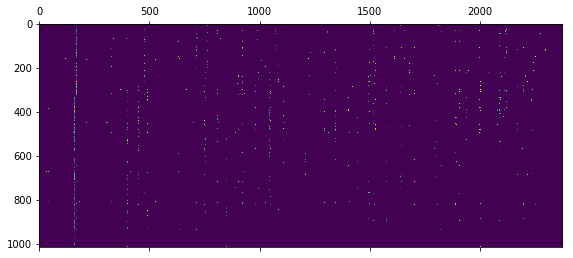

In [9]:
plt.figure(figsize=(18,8))
plt.matshow(X)

In [10]:
len(disciplinas)

297

In [11]:
print('numero alunos', Y.shape[0])
print('numero alunos aprovados', np.sum(Y))

numero alunos 1014
numero alunos aprovados 86


In [12]:
from sklearn.decomposition import pca

pca = PCA(n_components=200)
pca.fit(X)

print(pca.explained_variance_ratio_)  

[ 0.0963192   0.0753412   0.03617011  0.02537599  0.02254868  0.01968442
  0.01735872  0.01588455  0.01469931  0.01385638  0.01315516  0.01238268
  0.01219334  0.01101047  0.01035537  0.01005407  0.00977883  0.00946184
  0.00917269  0.00871871  0.00862761  0.00830555  0.00824557  0.00782523
  0.00776734  0.00763966  0.00757712  0.00741991  0.00703544  0.00696018
  0.00680113  0.00668558  0.00640291  0.006277    0.00617695  0.00585163
  0.00584531  0.00580087  0.00571966  0.0055579   0.00552483  0.00541046
  0.00524975  0.00516457  0.00503123  0.00500854  0.00485843  0.00481276
  0.00469809  0.00462162  0.00459658  0.004426    0.00430448  0.00423344
  0.00419008  0.00417947  0.00410846  0.00408817  0.00403105  0.00400998
  0.00388978  0.0038346   0.0037946   0.00368868  0.00363957  0.00362037
  0.00356917  0.0035487   0.00350802  0.00342011  0.00335782  0.00331982
  0.00330322  0.00321043  0.00317696  0.00313238  0.00306786  0.00305128
  0.00300401  0.00296274  0.00291226  0.00290077  0

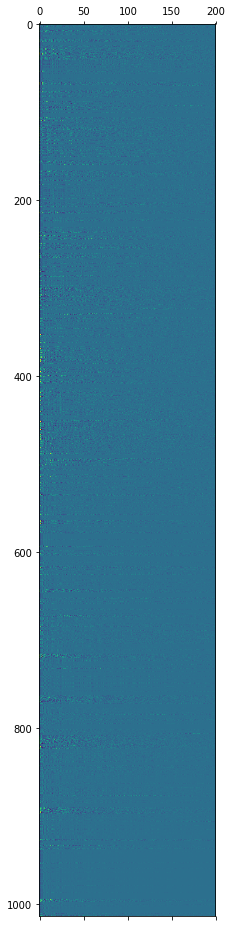

In [13]:
X = pca.transform(X)

plt.figure(figsize=(18,8))
plt.matshow(X)

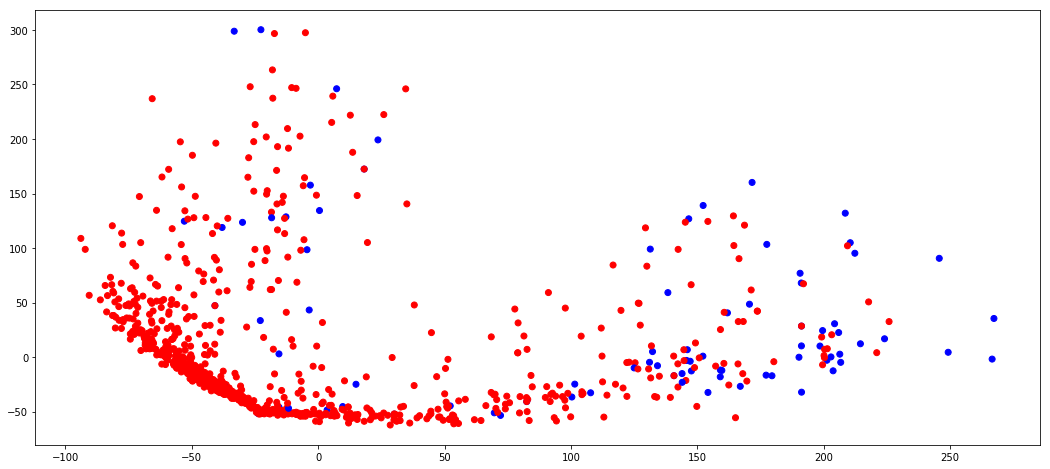

In [14]:
plt.figure(figsize=(18,8))
plt.scatter(X[:,0],X[:,1], c=Y,cmap=cm_bright)

In [15]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [16]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process", "Decision Tree", 
         "Random Forest", "Neural Net", "RBF SVM", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
                KNeighborsClassifier(10),
                SVC(kernel="linear", C=0.025),
                SVC(gamma=2, C=1),
                GaussianProcessClassifier(1.0 * RBF(1.0)),
                DecisionTreeClassifier(max_depth=5),
                RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
                MLPClassifier(alpha=1),
                AdaBoostClassifier(),
                GaussianNB(),
                QuadraticDiscriminantAnalysis()
             ]

In [17]:
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(912, 200)
(912,)
(102, 200)
(102,)


# Temos que balancear as classes (copiar amostras 1 10 vezes no dado)

In [18]:
ids = np.where(Y_train==1)[0]

In [19]:
X_train_temp = np.array(X_train[ids])
Y_train_temp = np.array(Y_train[ids])

In [20]:
for i in range(10):
    X_train = np.vstack([X_train,X_train_temp])
    Y_train = np.concatenate([Y_train,Y_train_temp])


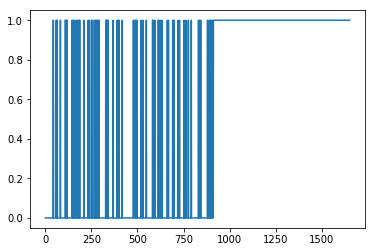

In [21]:
plt.plot(Y_train)

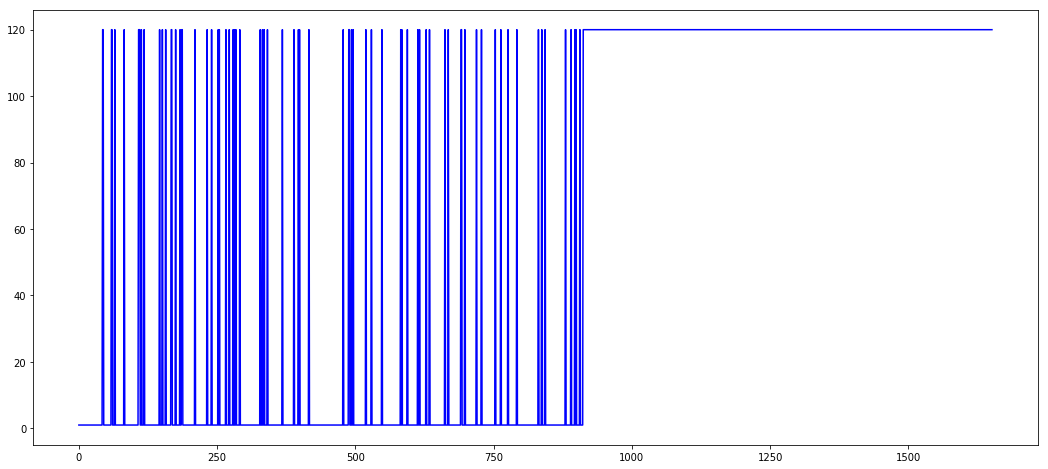

In [22]:
# iterate over classifiers




sample_weight = np.array(Y_train)
sample_weight[sample_weight==1]=120
sample_weight[sample_weight==0]=1

plt.figure(figsize=(18,8))
plt.plot(sample_weight, 'b-');

In [23]:
# Implementação de Classificador pelo Alex
#classifiers[6].fit(X_train, Y_train)
#score = classifiers[6].score(X_test, Y_test, sample_weight=sample_weight)

#Implementação de Classificador pelo Gustavo
clf = MLPClassifier( hidden_layer_sizes=(200, 100,30,10,5),tol=0.0000000000001,max_iter=2000, random_state=12,verbose=True)
print('\n=================================================================================')
print('CLASSIFICADOR: ' +str(clf.fit(X_train, Y_train)))
print('\n=================================================================================')
print('SCORE DO CLASSIFICADOR: '+str(clf.score(X_test, Y_test)))
print('\n=================================================================================')


Iteration 1, loss = 0.68925838
Iteration 2, loss = 0.57368113
Iteration 3, loss = 0.42952211
Iteration 4, loss = 0.32233869
Iteration 5, loss = 0.28392055
Iteration 6, loss = 0.27552045
Iteration 7, loss = 0.27110950
Iteration 8, loss = 0.26668278
Iteration 9, loss = 0.26334297
Iteration 10, loss = 0.26068061
Iteration 11, loss = 0.25853509
Iteration 12, loss = 0.25638873
Iteration 13, loss = 0.25431723
Iteration 14, loss = 0.25255122
Iteration 15, loss = 0.25042371
Iteration 16, loss = 0.24830832
Iteration 17, loss = 0.24654218
Iteration 18, loss = 0.24478311
Iteration 19, loss = 0.24297610
Iteration 20, loss = 0.24092891
Iteration 21, loss = 0.23972149
Iteration 22, loss = 0.23812083
Iteration 23, loss = 0.23663511
Iteration 24, loss = 0.23458774
Iteration 25, loss = 0.23287291
Iteration 26, loss = 0.23146109
Iteration 27, loss = 0.22959374
Iteration 28, loss = 0.22879245
Iteration 29, loss = 0.22667220
Iteration 30, loss = 0.22503530
Iteration 31, loss = 0.22373357
Iteration 32, lo

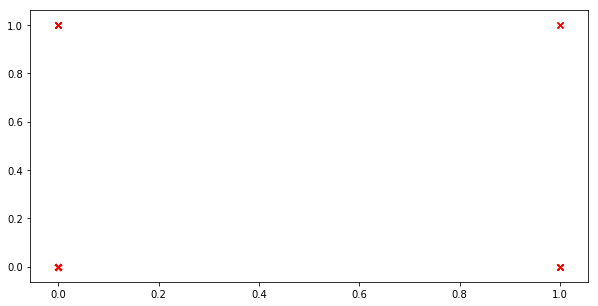

In [24]:
#yhat = classifiers[0].predict(X_test)
#plt.scatter(Y_test,yhat)

YHAT = clf.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(Y_test, YHAT, c='r', marker='x')


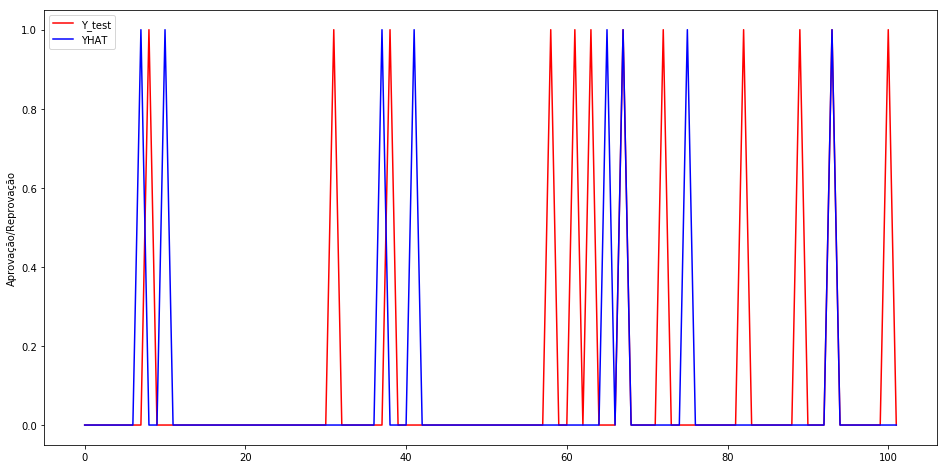

In [25]:
plt.figure(figsize=(16,8))
plt.plot(Y_test, 'r-', label='Y_test')
plt.plot(YHAT, 'b-', label='YHAT')
plt.ylabel('Aprovação/Reprovação')
plt.legend(loc=2);

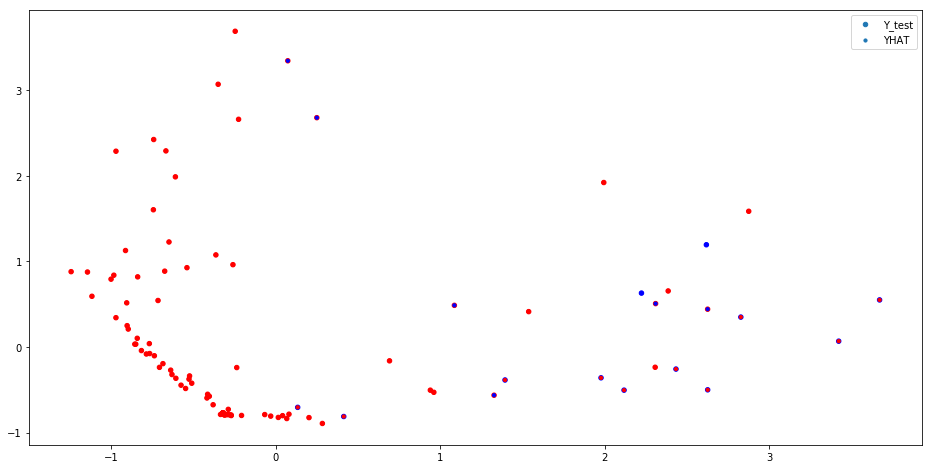

In [26]:
#plt.scatter(X_test[:,0],X_test[:,1], c=Y_test, cmap=cm_bright)
#plt.scatter(X_test[:,0],X_test[:,1], s=5, c=YHAT.ravel(), cmap=cm_bright)

plt.figure(figsize=(16,8))
plt.scatter(X_test[:,0],X_test[:,1], c=Y_test,s=20, cmap=cm_bright, label='Y_test')
plt.scatter(X_test[:,0],X_test[:,1], s=10, c=YHAT.ravel(), cmap=cm_bright, label='YHAT')
plt.legend(loc=1);